In [1]:
from IPython.display import HTML, display
from pyproj import Proj
import matplotlib.pyplot as plt
import csv
import datetime
import glob
%matplotlib inline

In [2]:
south_part_1 = [29.86708027, 121.53887449]
south_part_2_average = [29.86734011, 121.5383611]
north_part_1 = [29.86760479, 121.53864853]
north_part_2_average = [29.86750486, 121.5390446]

In [3]:
utm_zone = 51
projection = Proj(proj='utm', zone=utm_zone, ellps='WGS84')

In [4]:
def latlon_to_utm(lat, lon):
    """Returns (x, y) coordinates in metres"""
    return projection(lon, lat)

In [5]:
def position_utm_process(FILE):
    time = []
    positions_utm = []
    latitudes = []
    longitudes = []
    with open(FILE) as logfile:
        data = csv.reader(logfile, delimiter=',')
        for row in list(data)[1:]:
            time.append(datetime.datetime.strptime(row[0], "%Y-%m-%dT%H:%M:%SZ").timestamp()) #store epoch
            latitude = float(row[1])
            longitude = float(row[2])
            latitude_metre, longitude_metre = latlon_to_utm(latitude, longitude)
            latitudes.append(latitude_metre)
            longitudes.append(longitude_metre)
    return time, latitudes, longitudes

In [6]:
def plot_trajectory(file_name):
    _, region, _ , attempt_name = file_name.split('/')
    part = attempt_name.split('-')[1][-2:]
    #print(region, part)
    display(HTML('<h2>{}</h2>'.format(attempt_name)))
    time, latitudes, longitudes = position_utm_process(file_name)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.plot(latitudes, longitudes)
    if region == 'south':
        if part == 'gA':
            centre = south_part_1
        elif part == 'gB':
            centre = south_part_2_average
        elif part == 'AB':
            centre = [south_part_1, south_part_2_average]
    elif region == 'north':
        if part == 'gA':
            centre = north_part_1
        elif part == 'gB':
            centre = north_part_2_average
        elif part == 'AB':
            centre = [north_part_1, north_part_2_average]
    #print(centre)
    if part == 'gA':
        c = plt.Circle(latlon_to_utm(centre[0], centre[1]), color='lightgreen', radius=15, alpha=0.3)
    if part == 'gB':
        c = plt.Circle(latlon_to_utm(centre[0], centre[1]), color='red', radius=15, alpha=0.3)
    if part == 'AB':
        c = plt.Circle(latlon_to_utm(centre[0][0], centre[0][1]), color='lightgreen', radius=15, alpha=0.3)
        c1 = plt.Circle(latlon_to_utm(centre[1][0], centre[1][1]), color='red', radius=15, alpha=0.3)
        ax.add_patch(c1)

    ax.add_patch(c)
    ax.set_aspect('equal')
    plt.show()

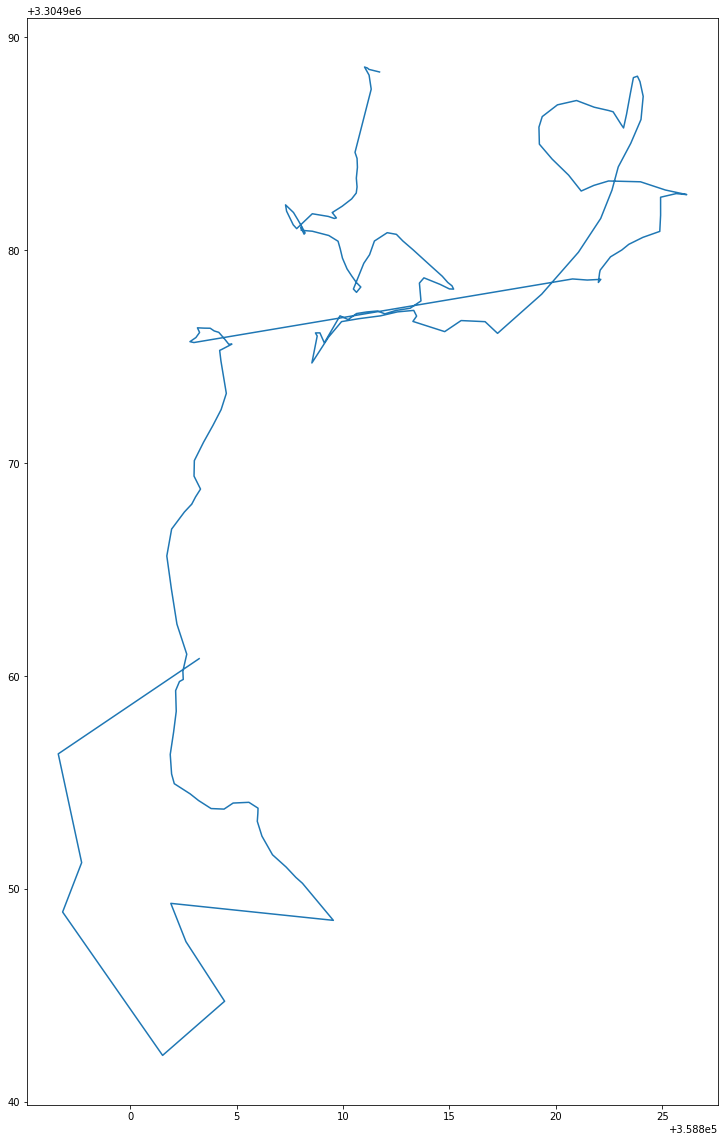

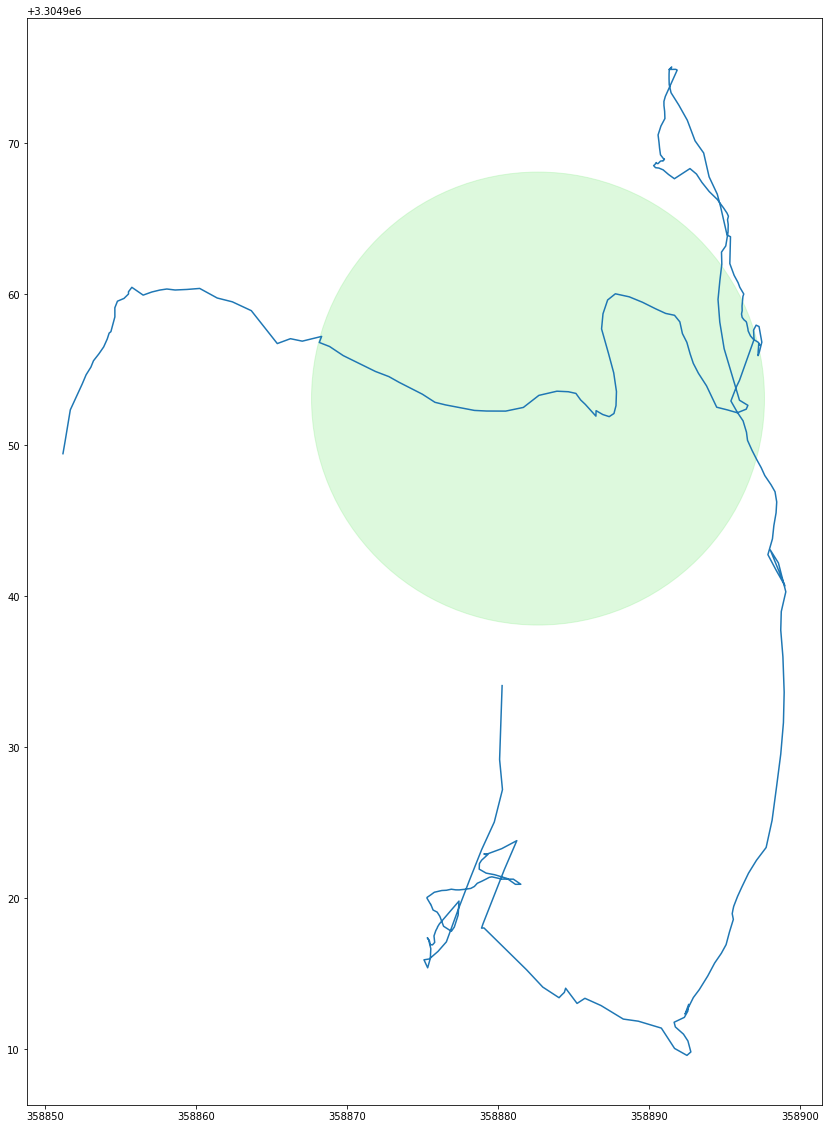

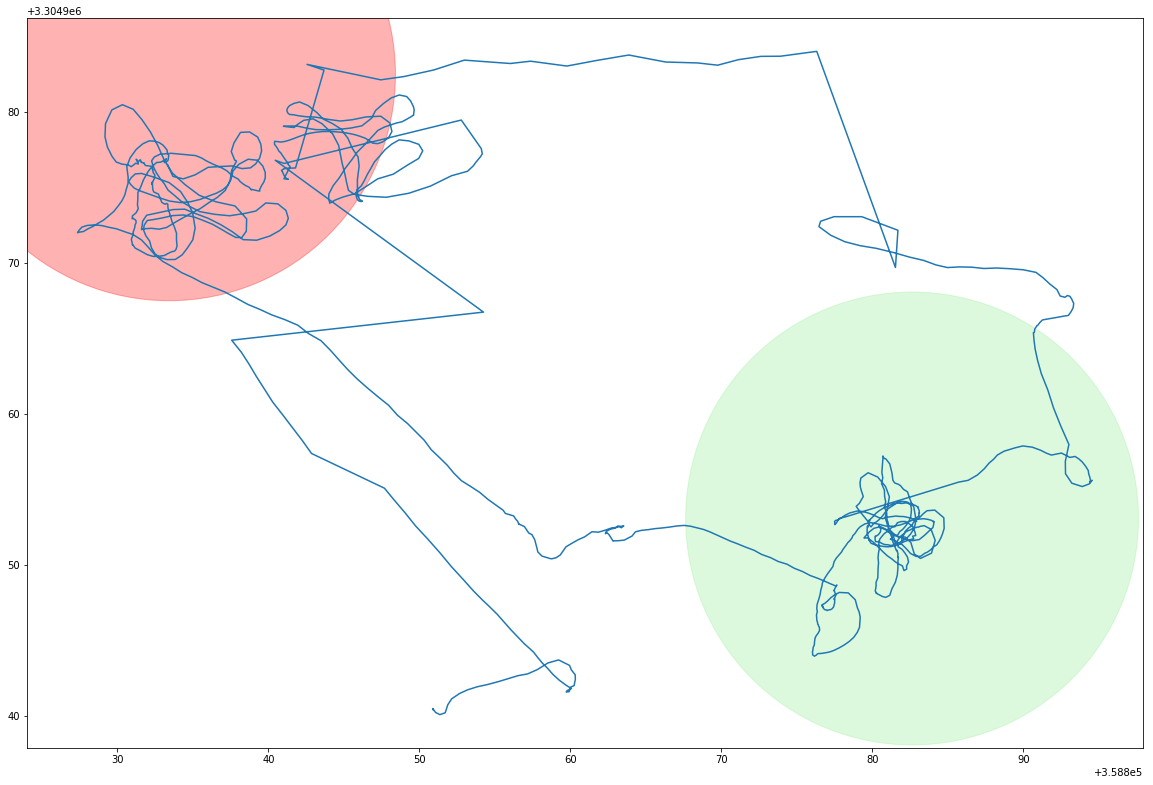

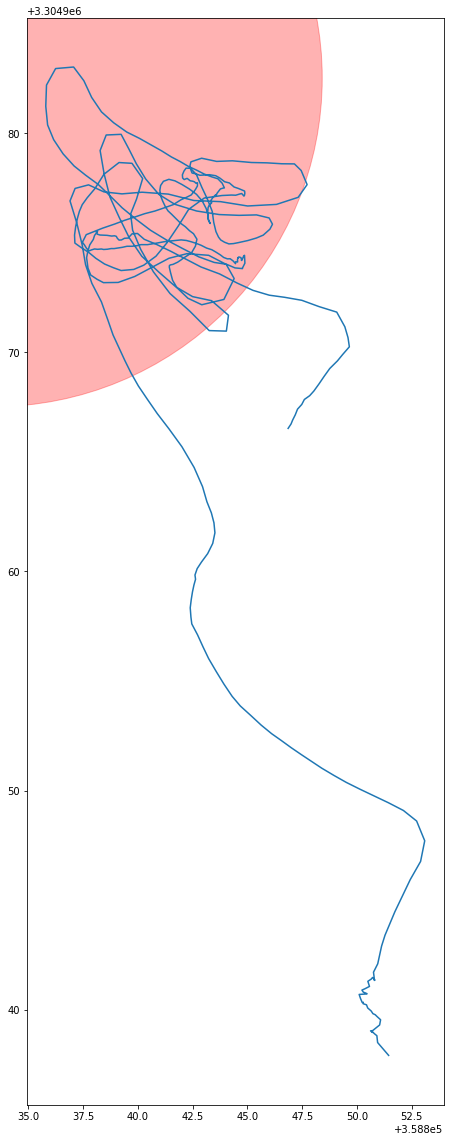

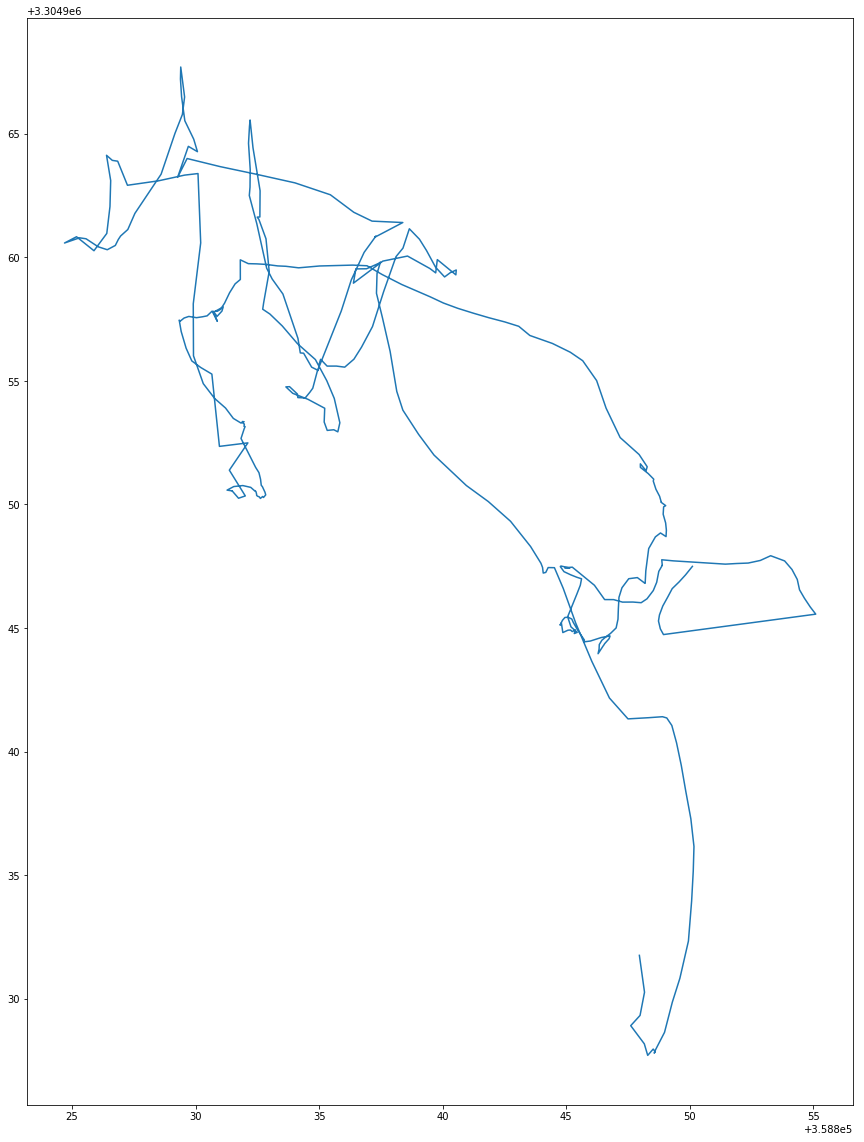

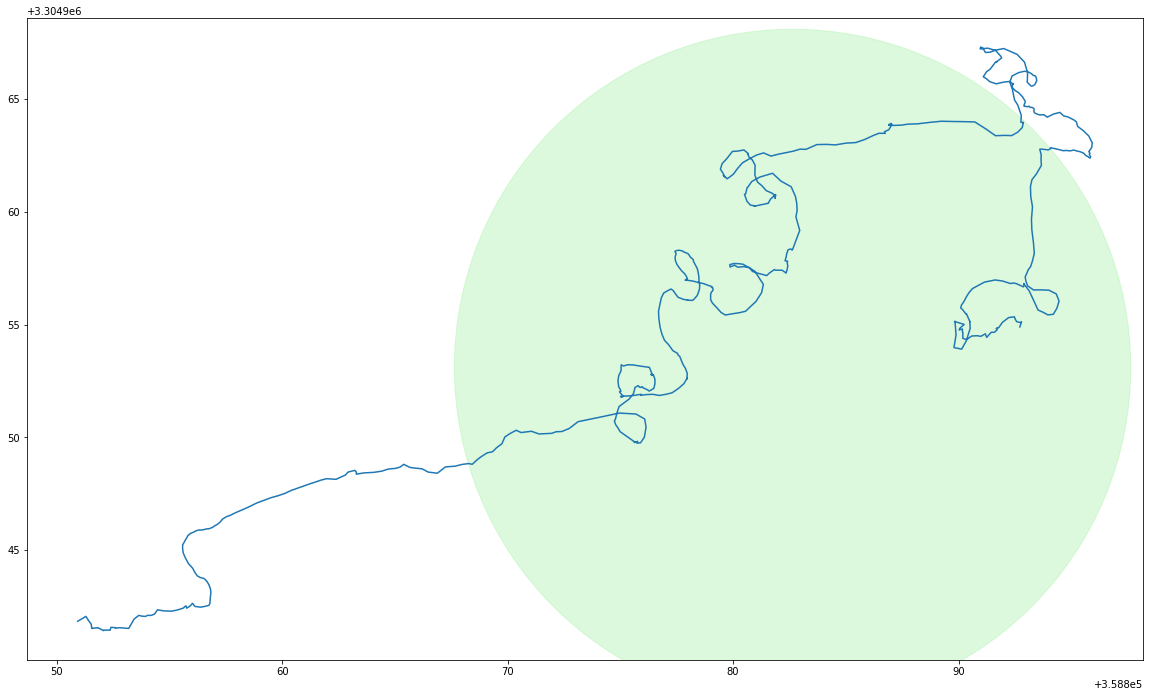

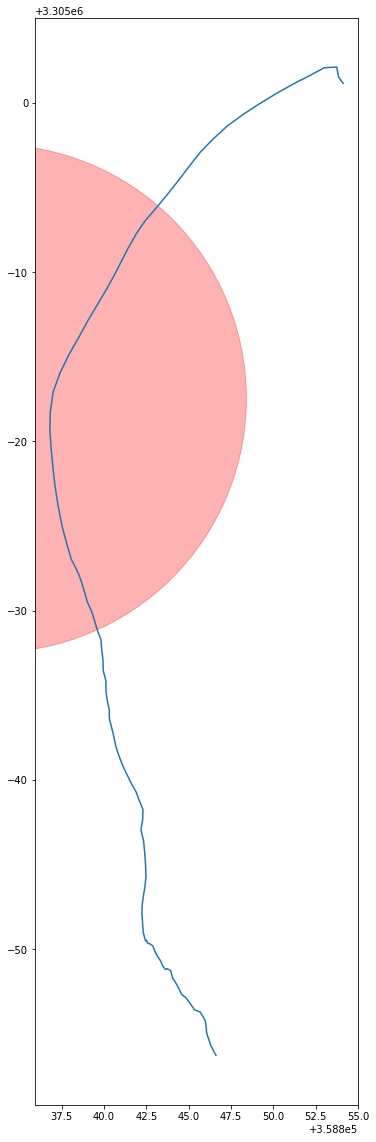

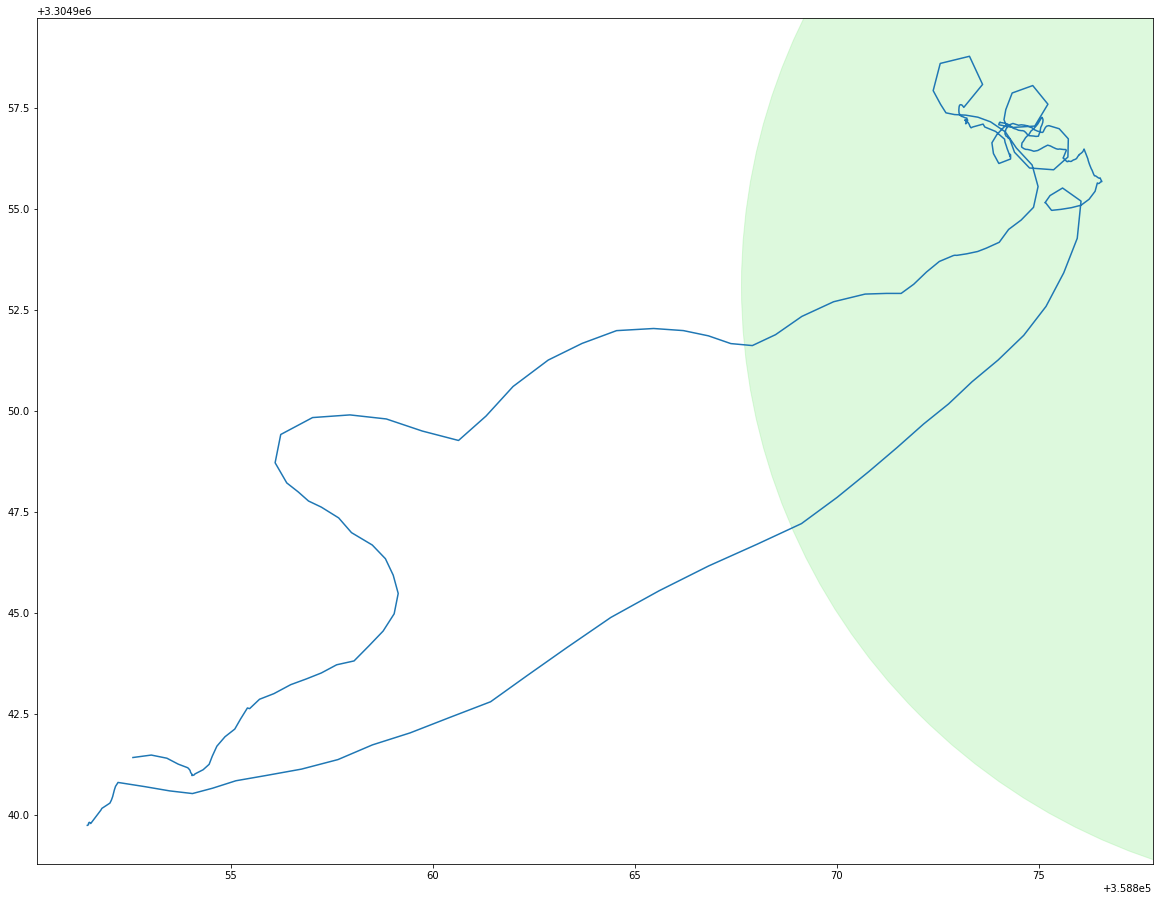

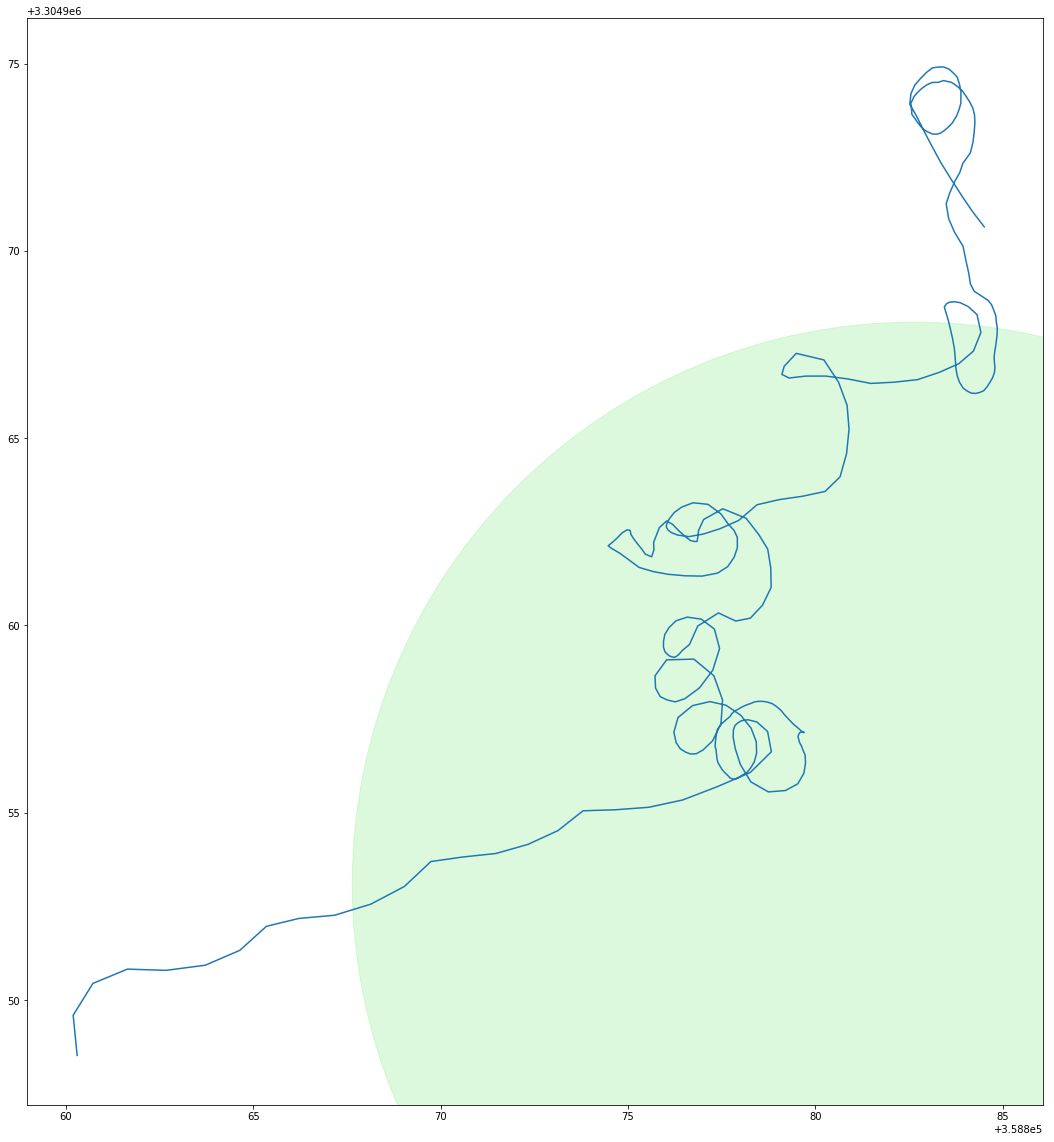

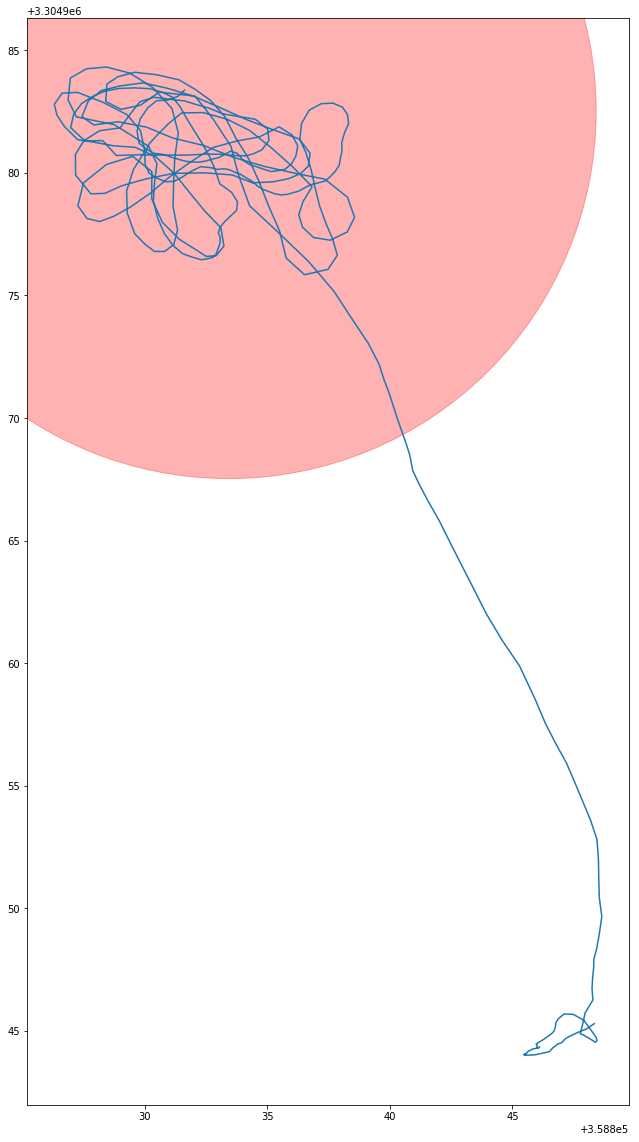

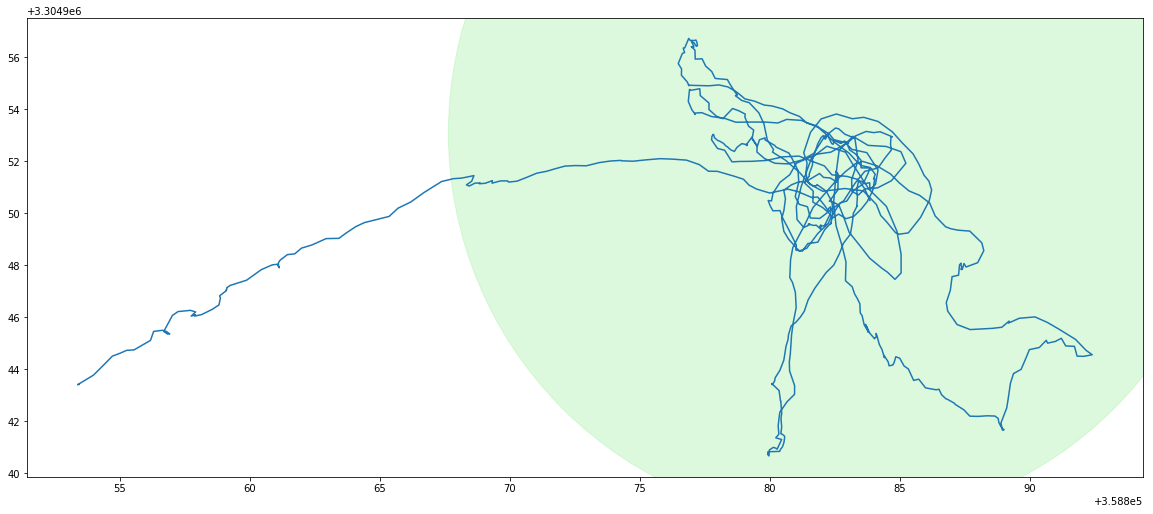

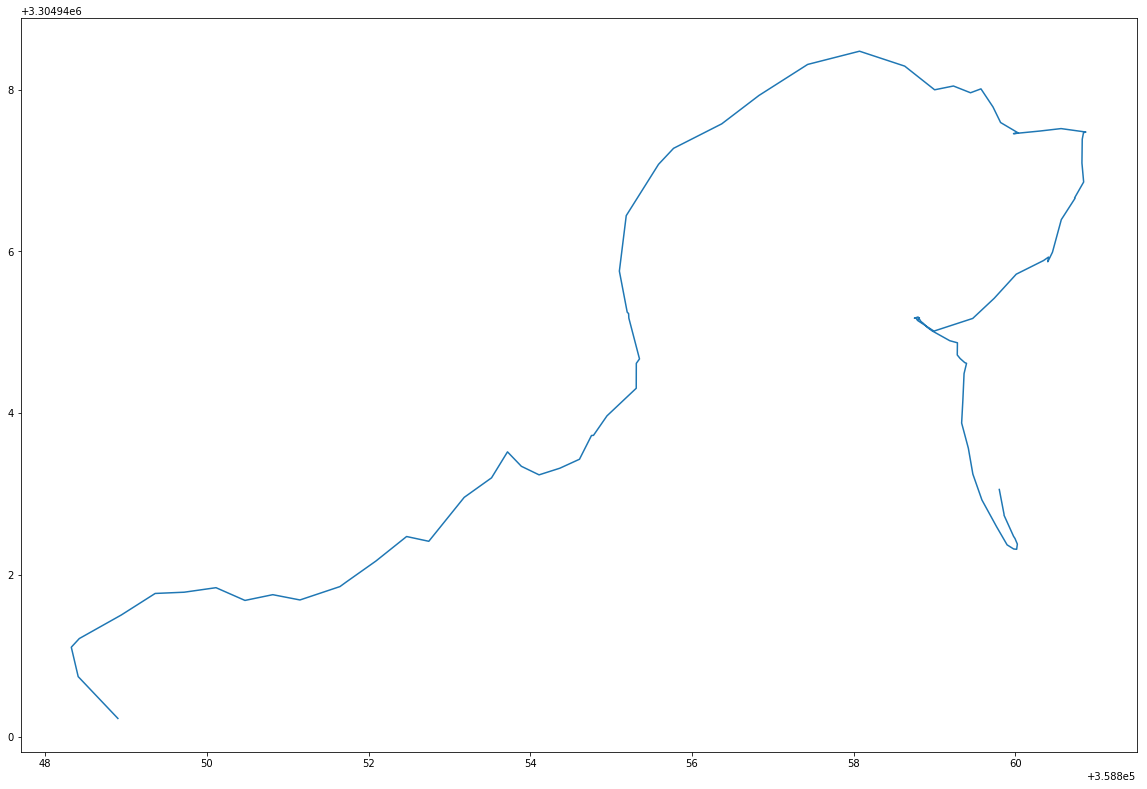

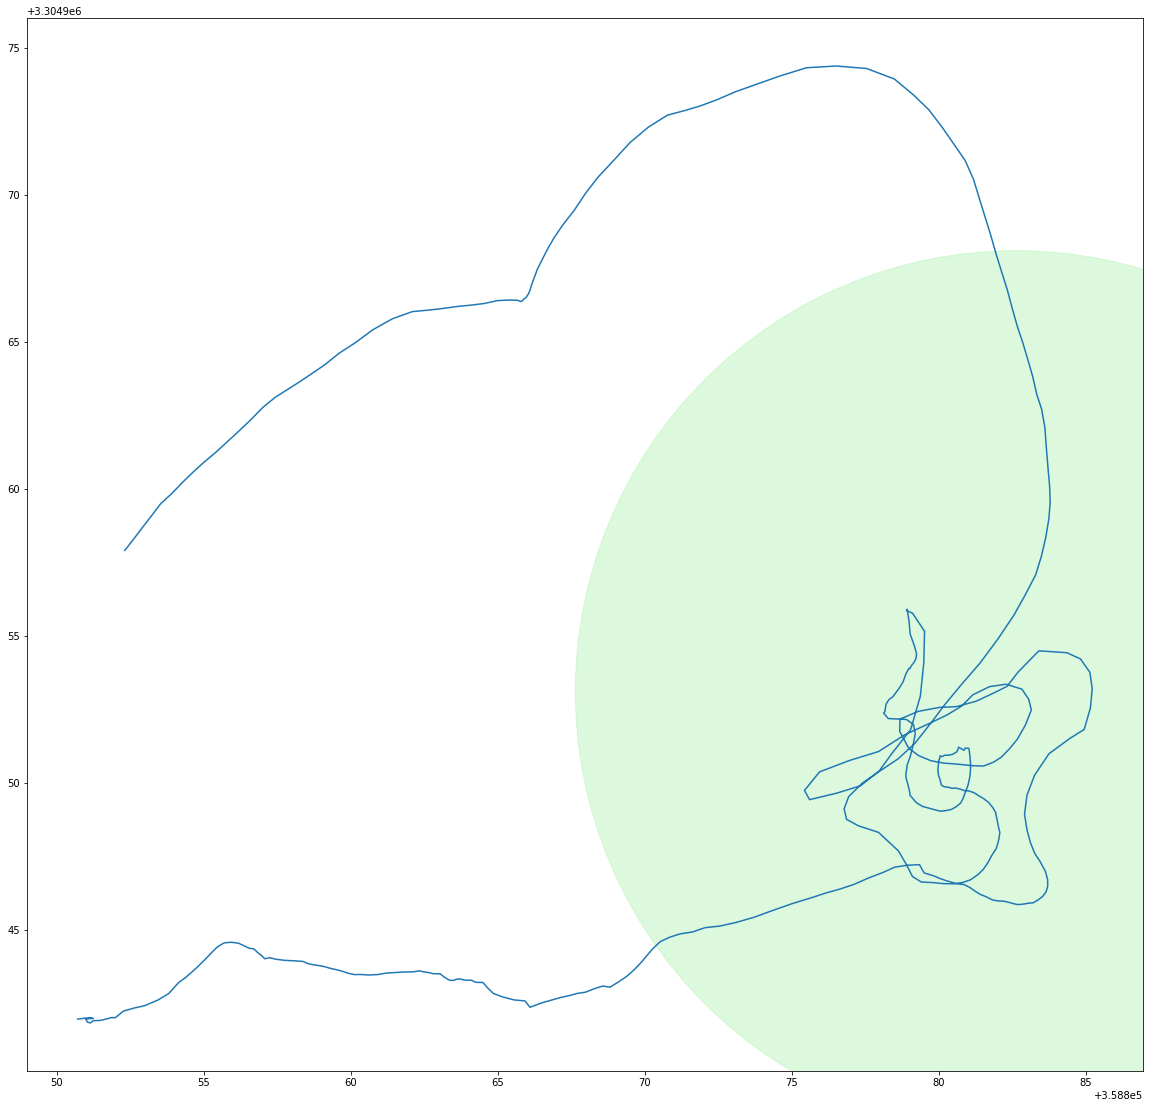

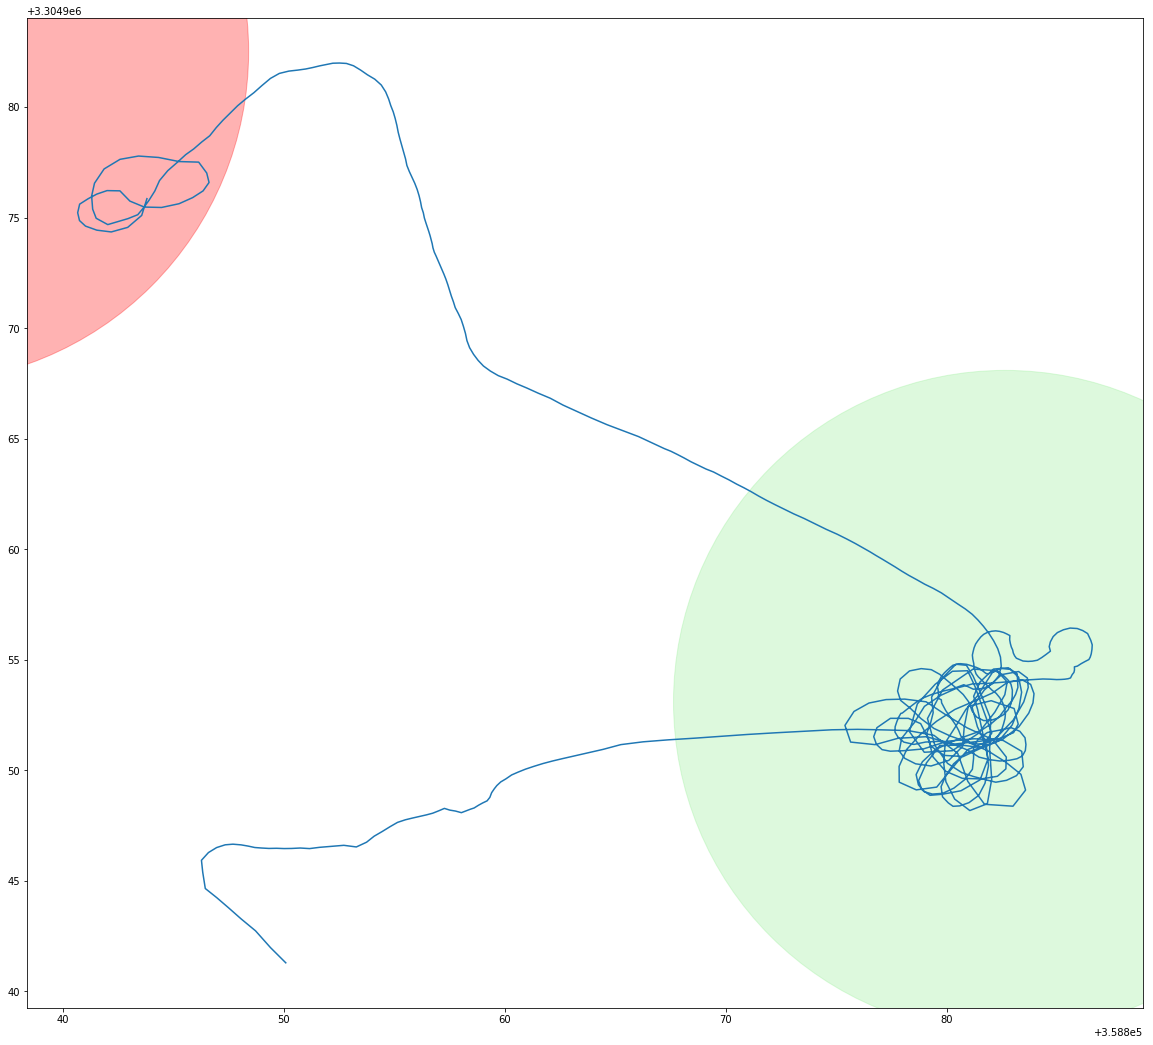

In [7]:
south_AM_attempts = glob.glob('./south/AM/*.csv')
for attempt in south_AM_attempts:
    plot_trajectory(attempt)

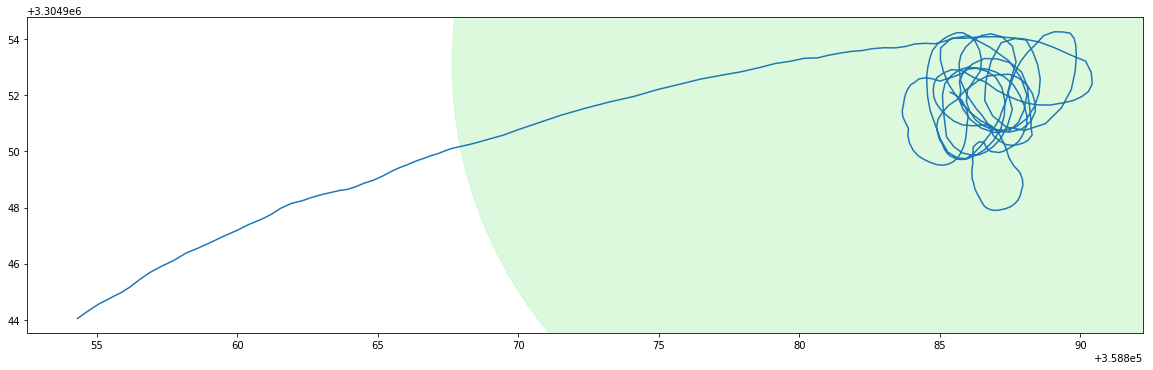

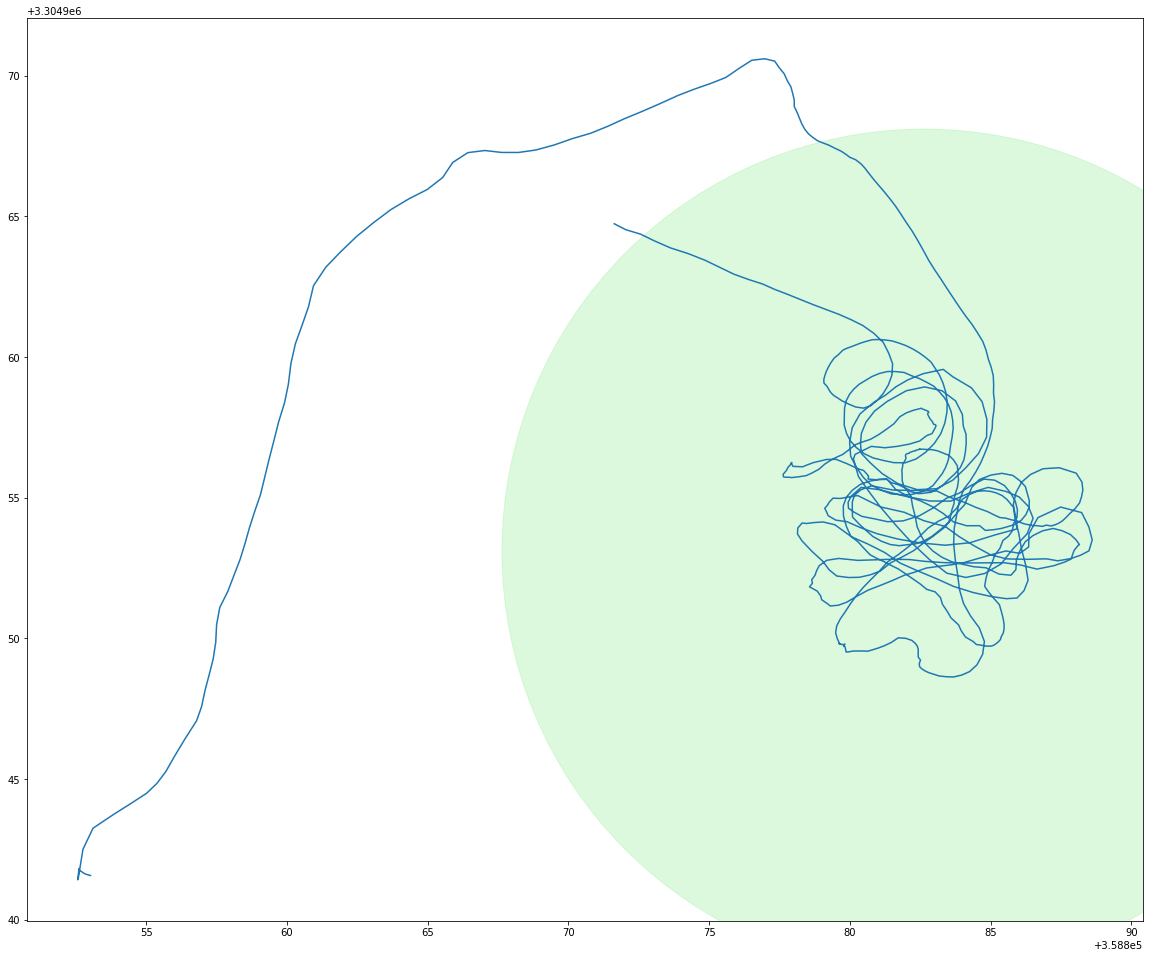

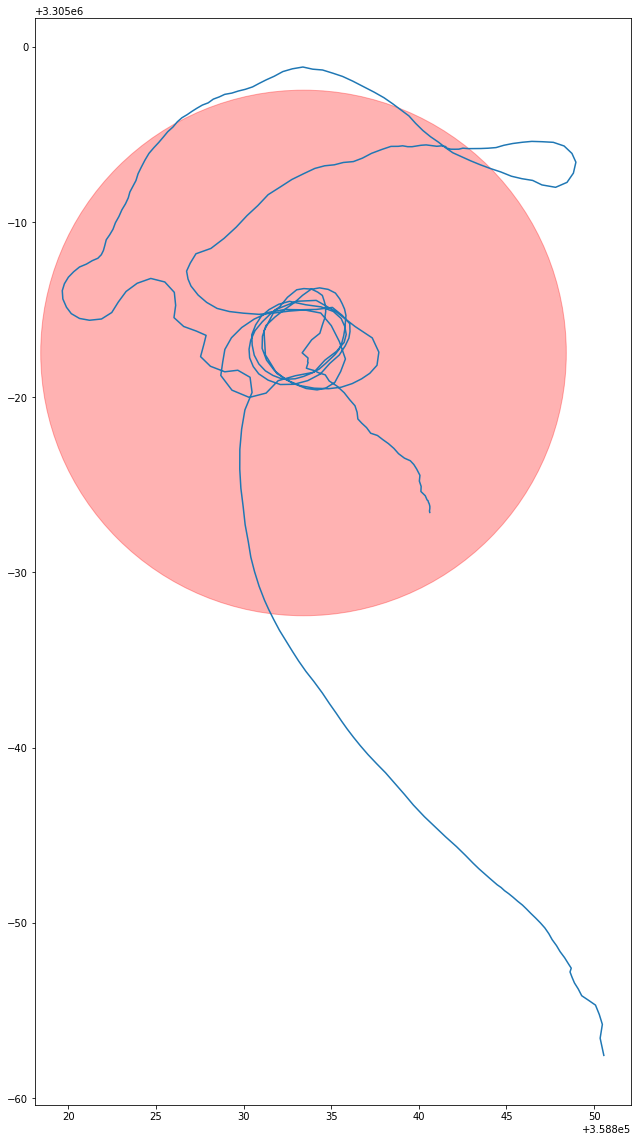

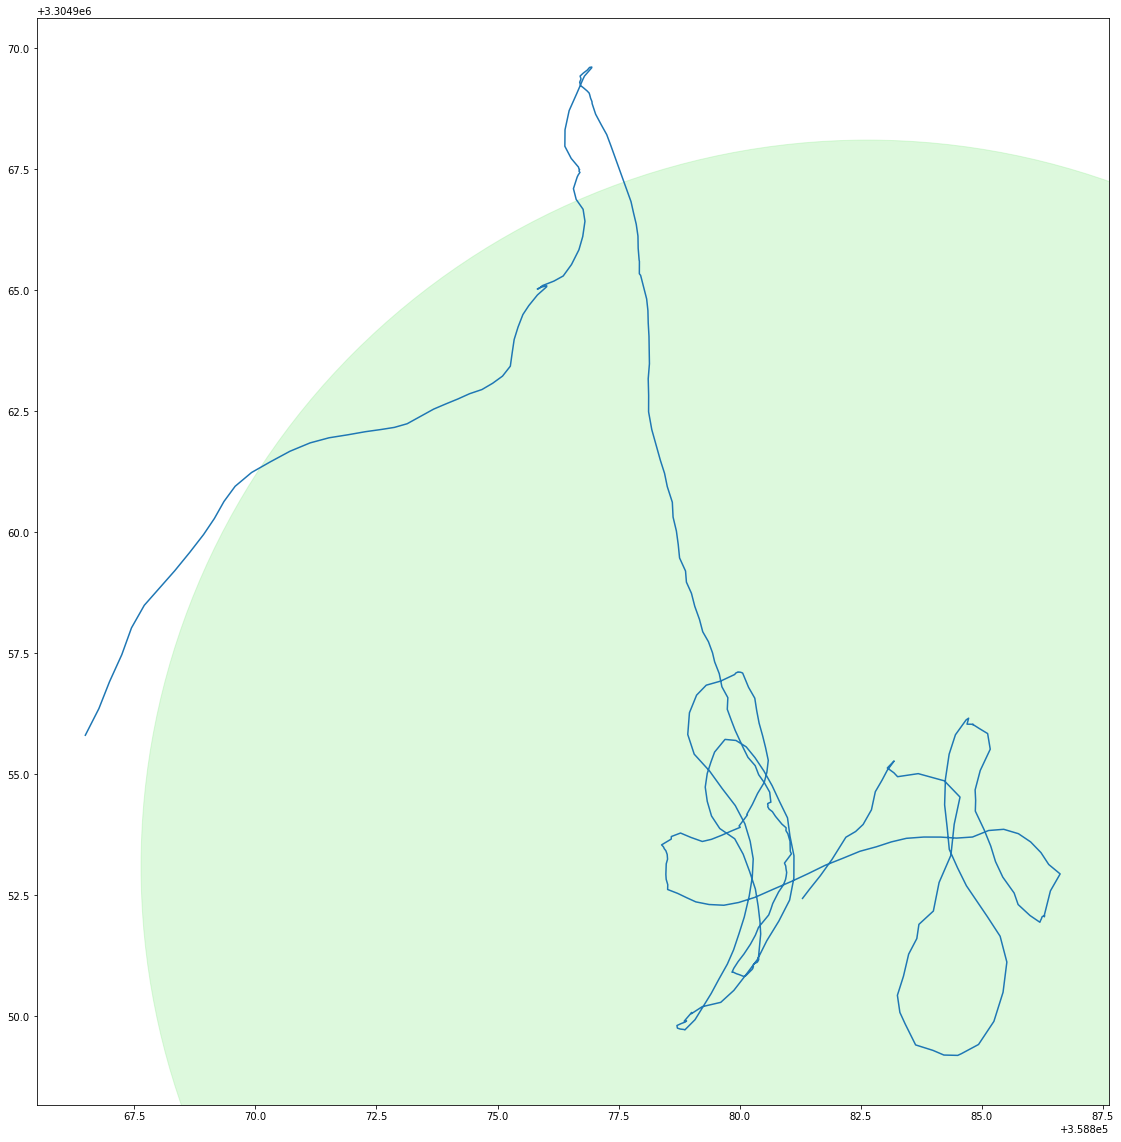

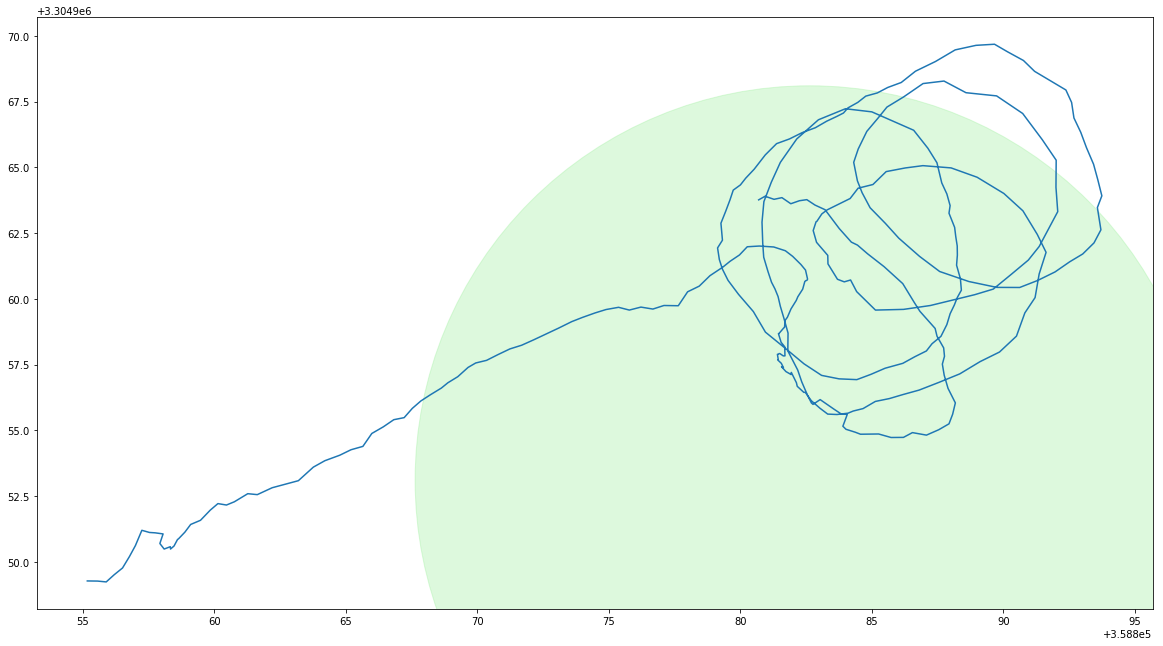

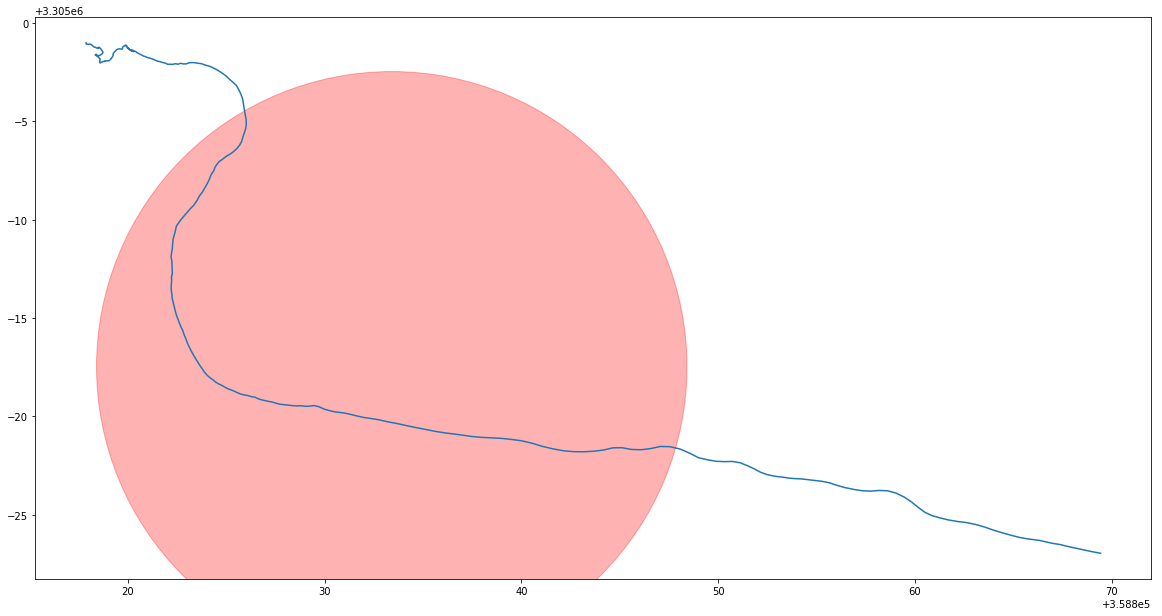

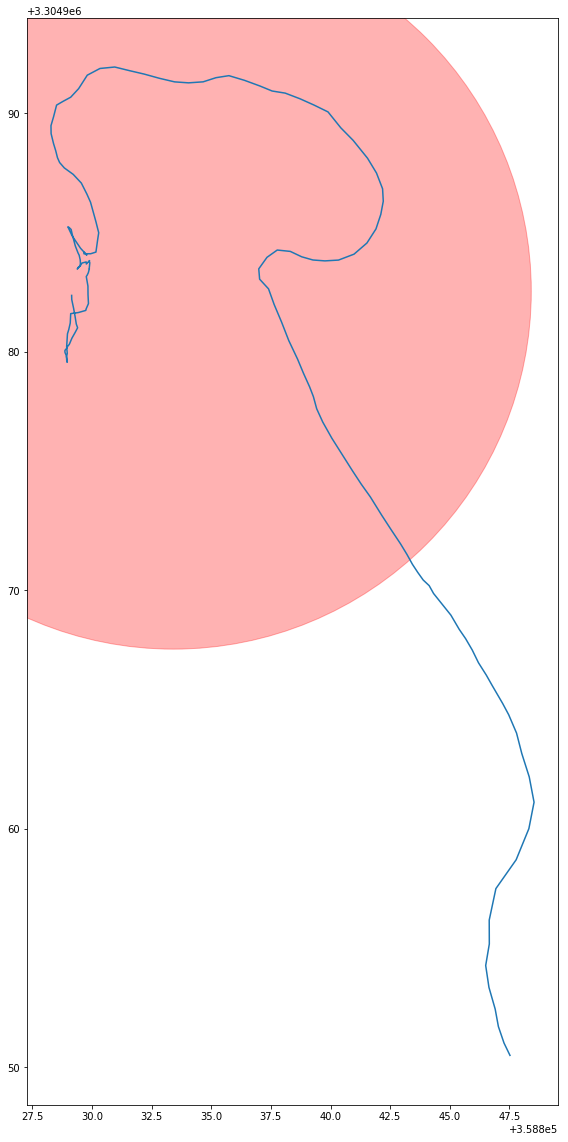

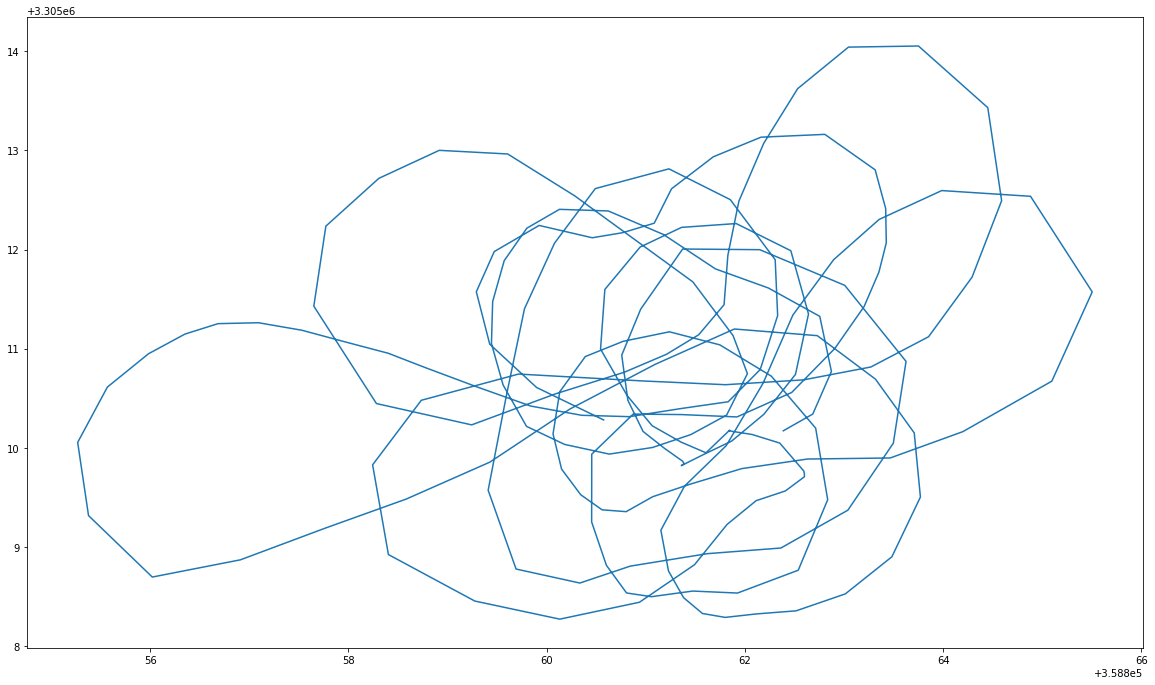

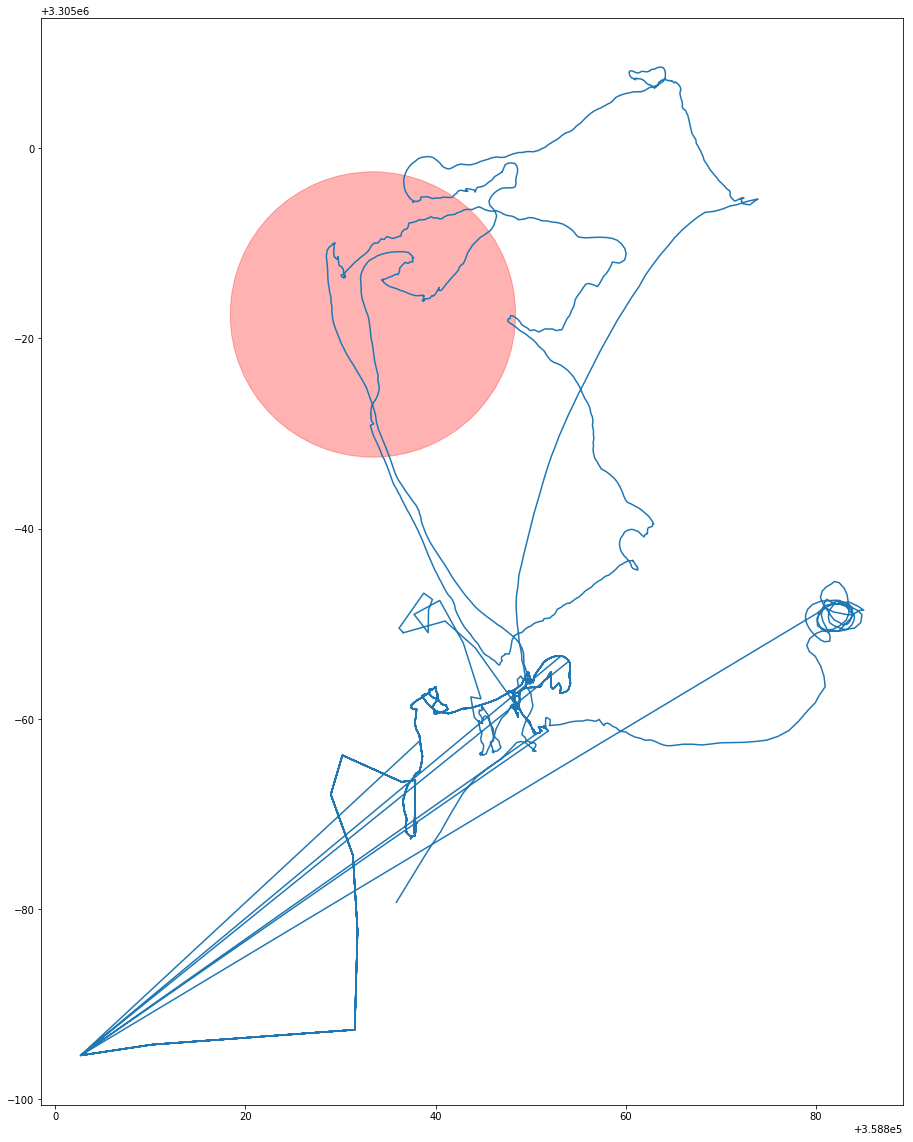

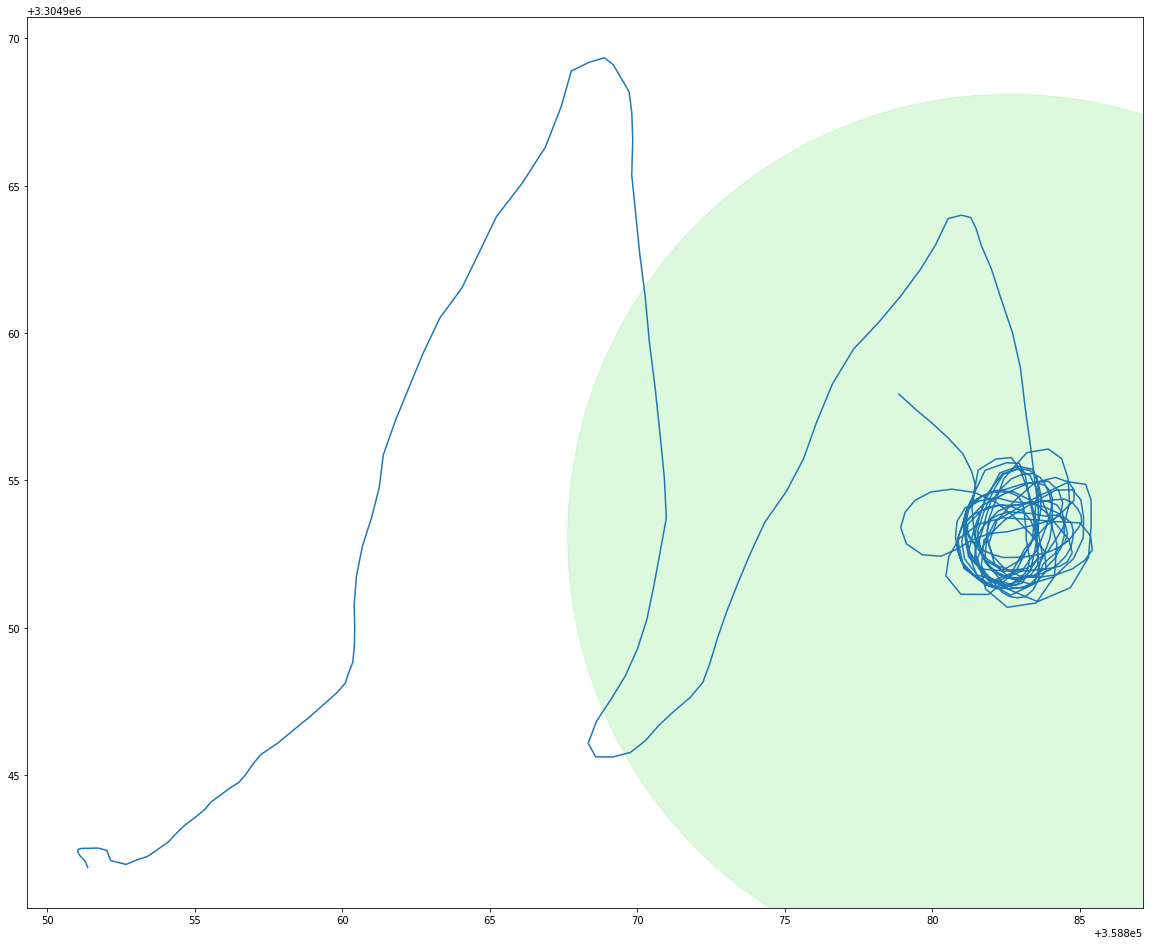

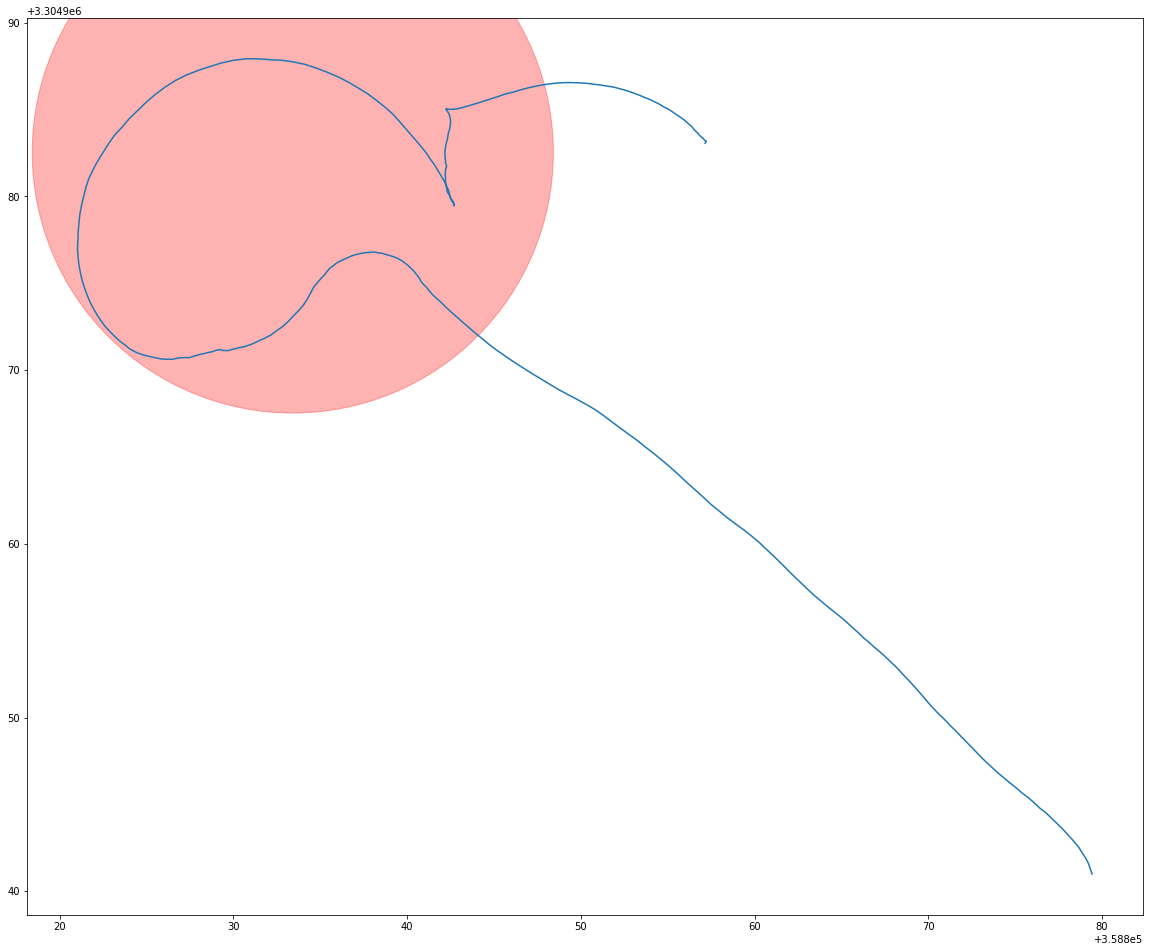

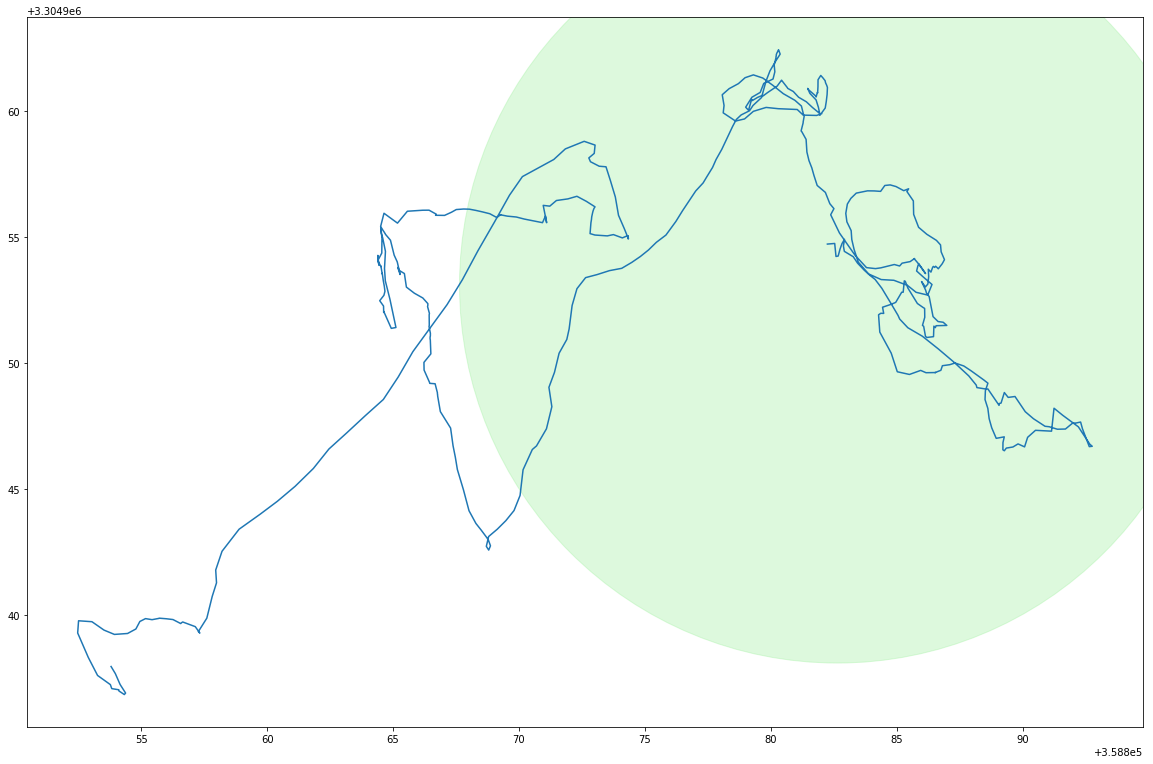

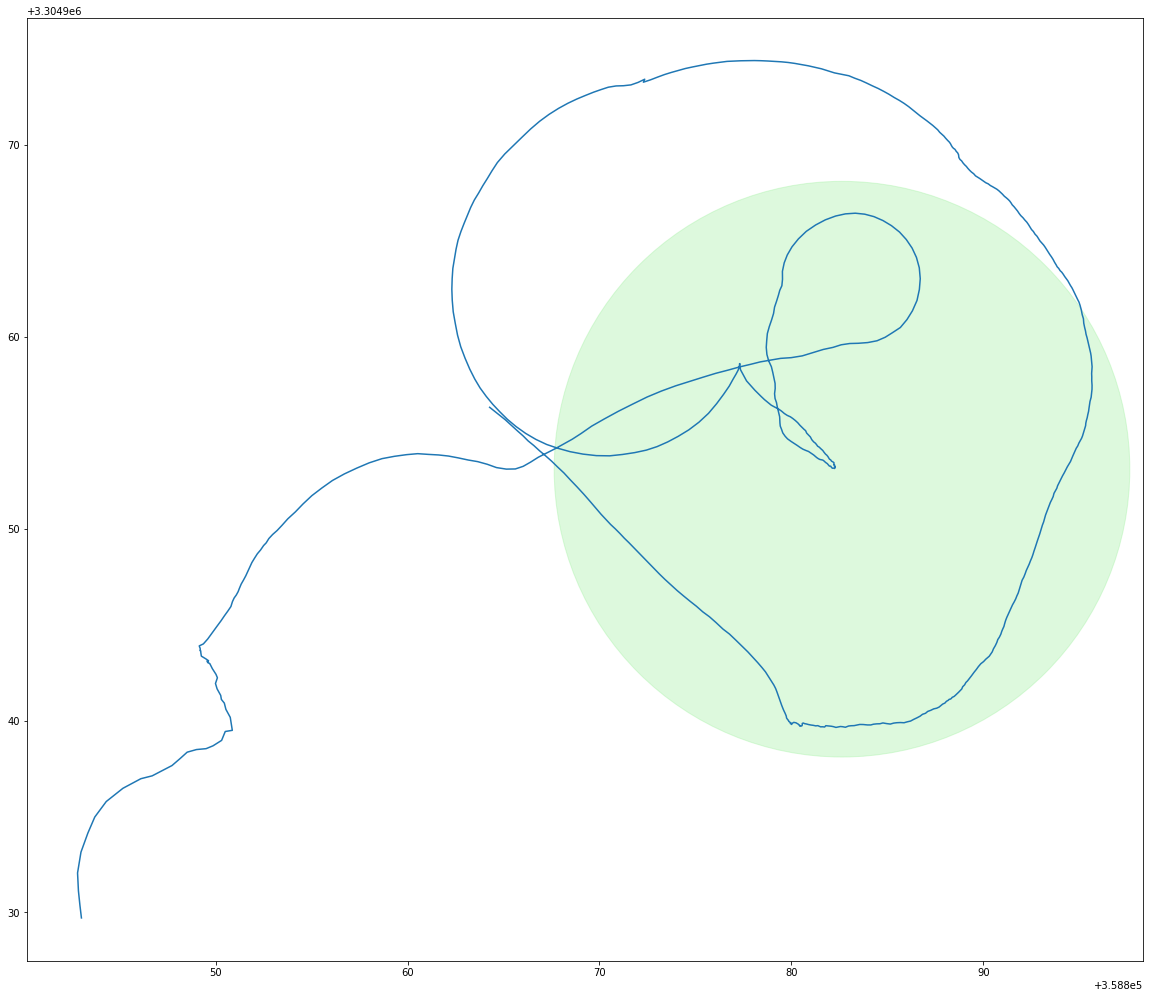

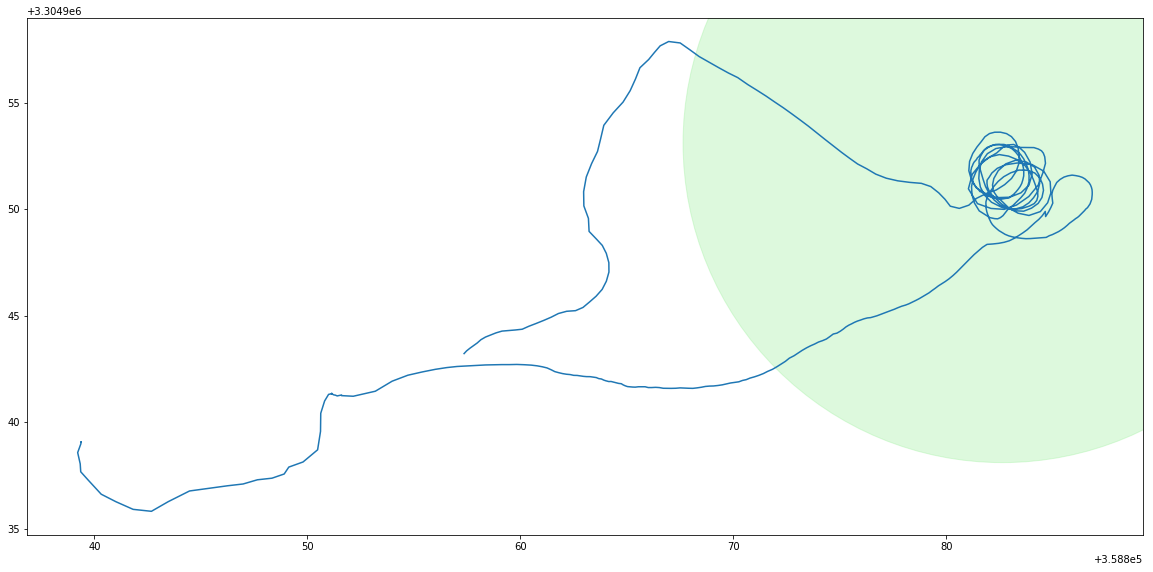

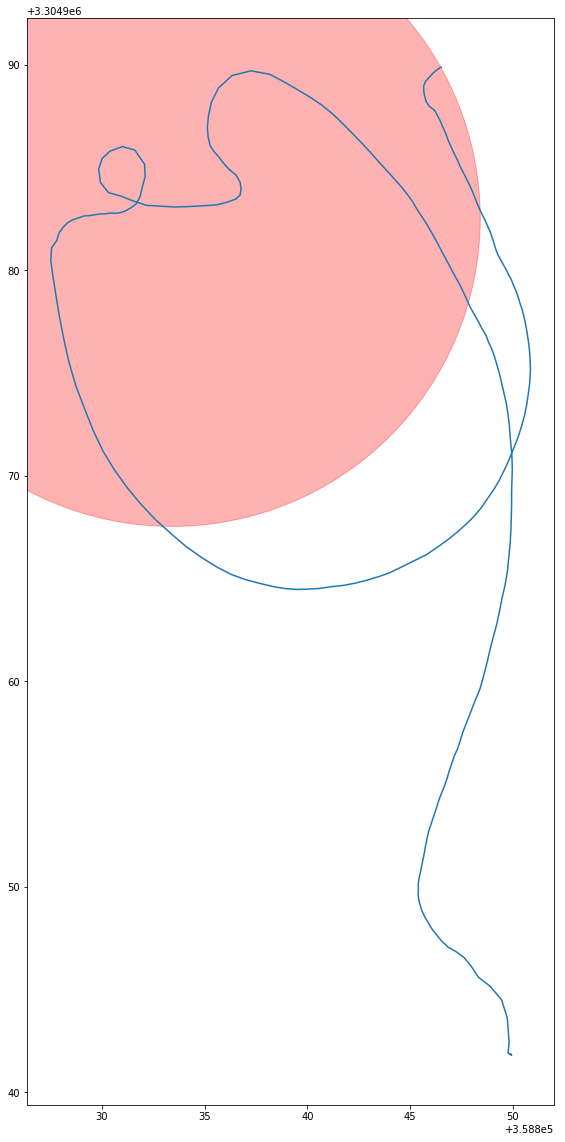

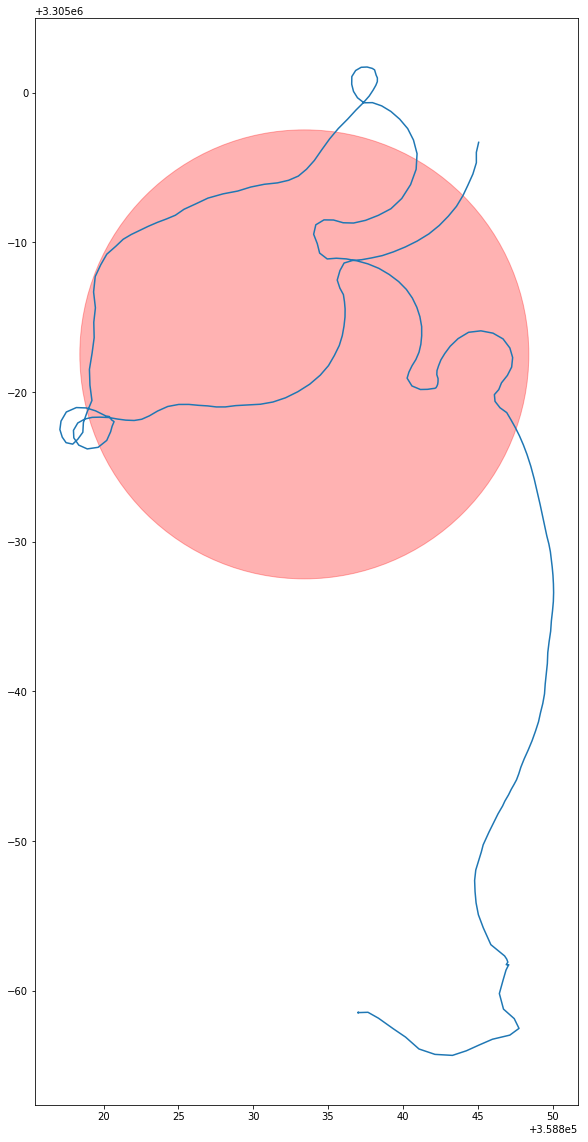

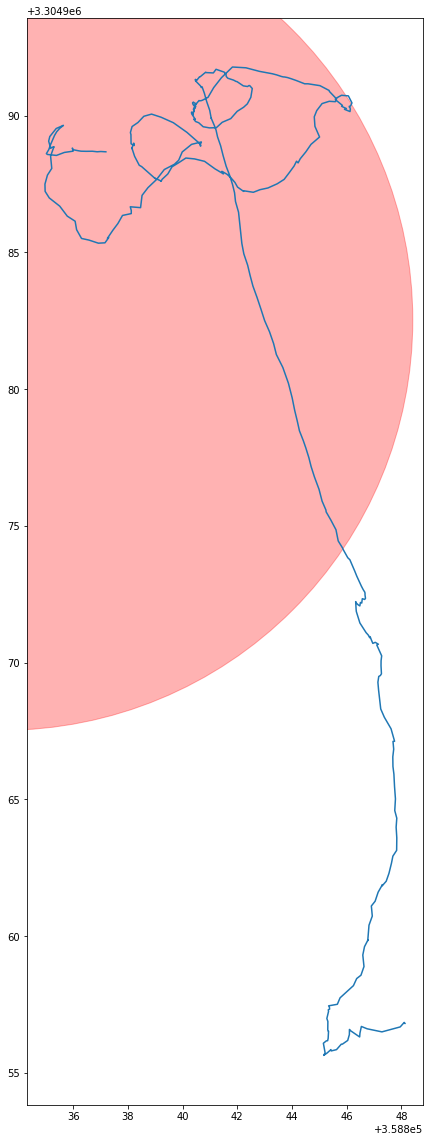

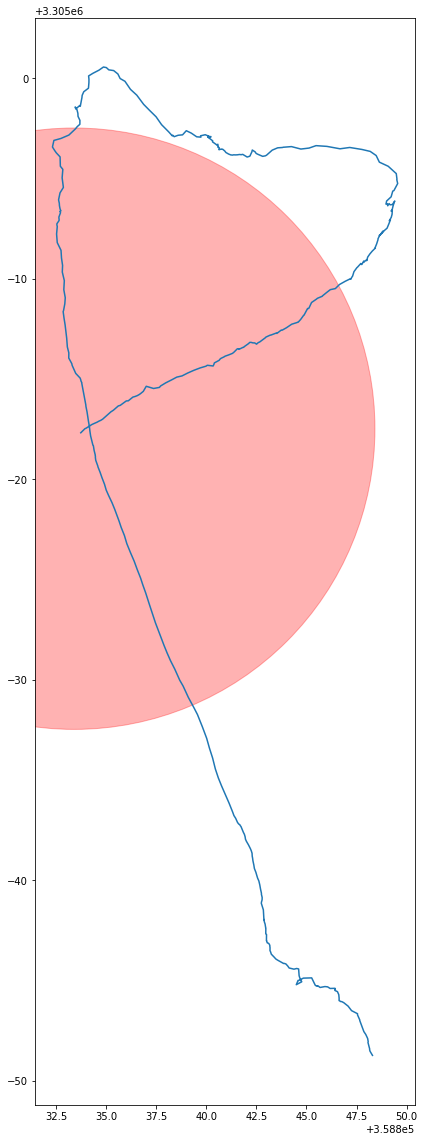

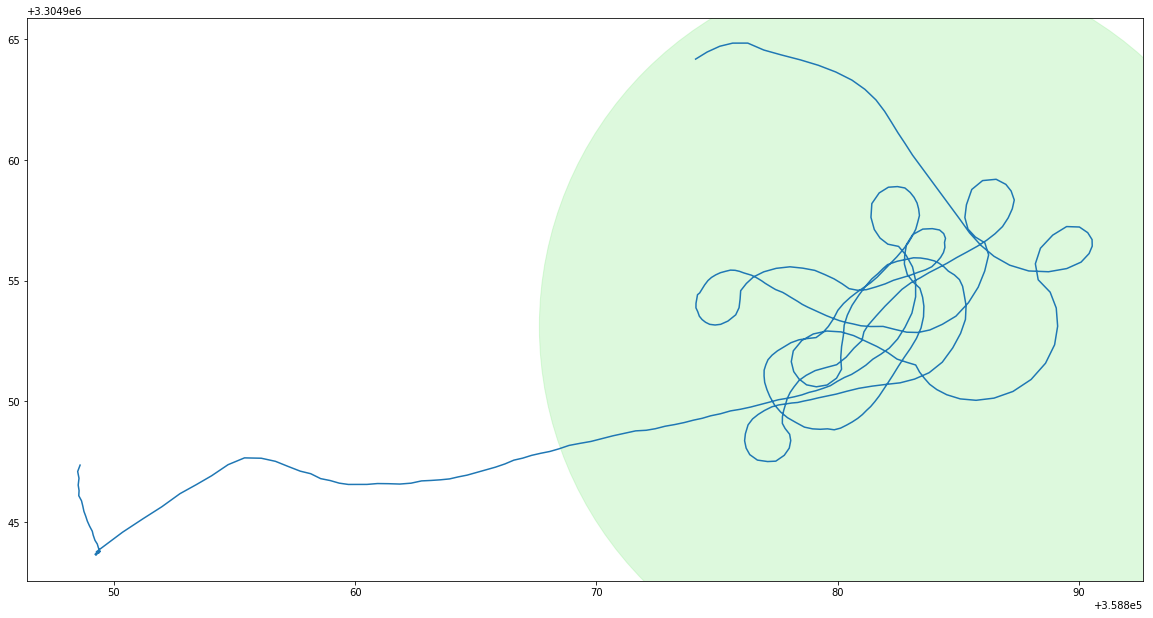

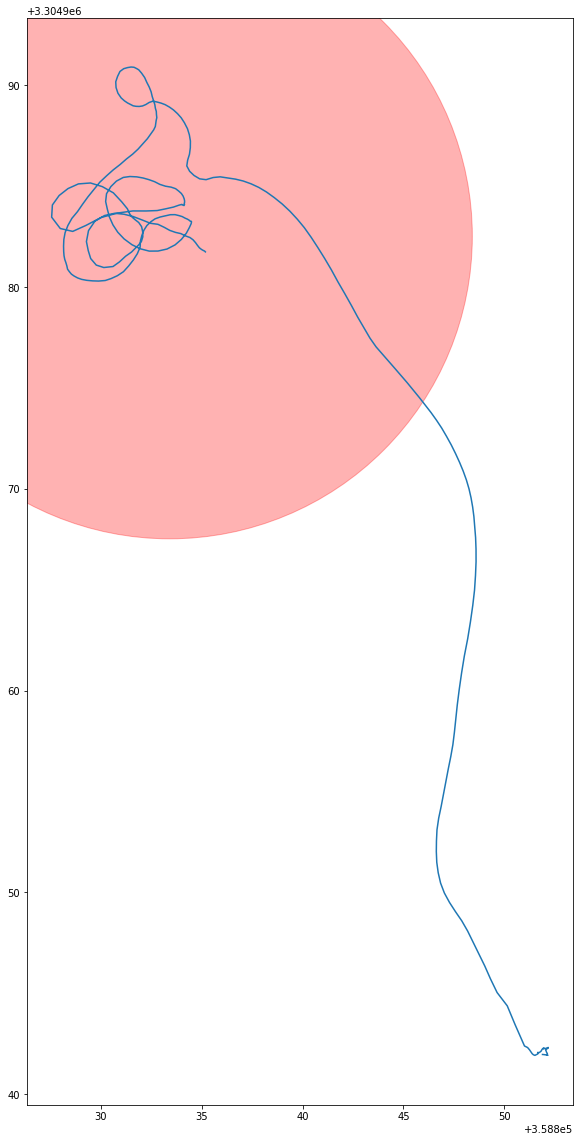

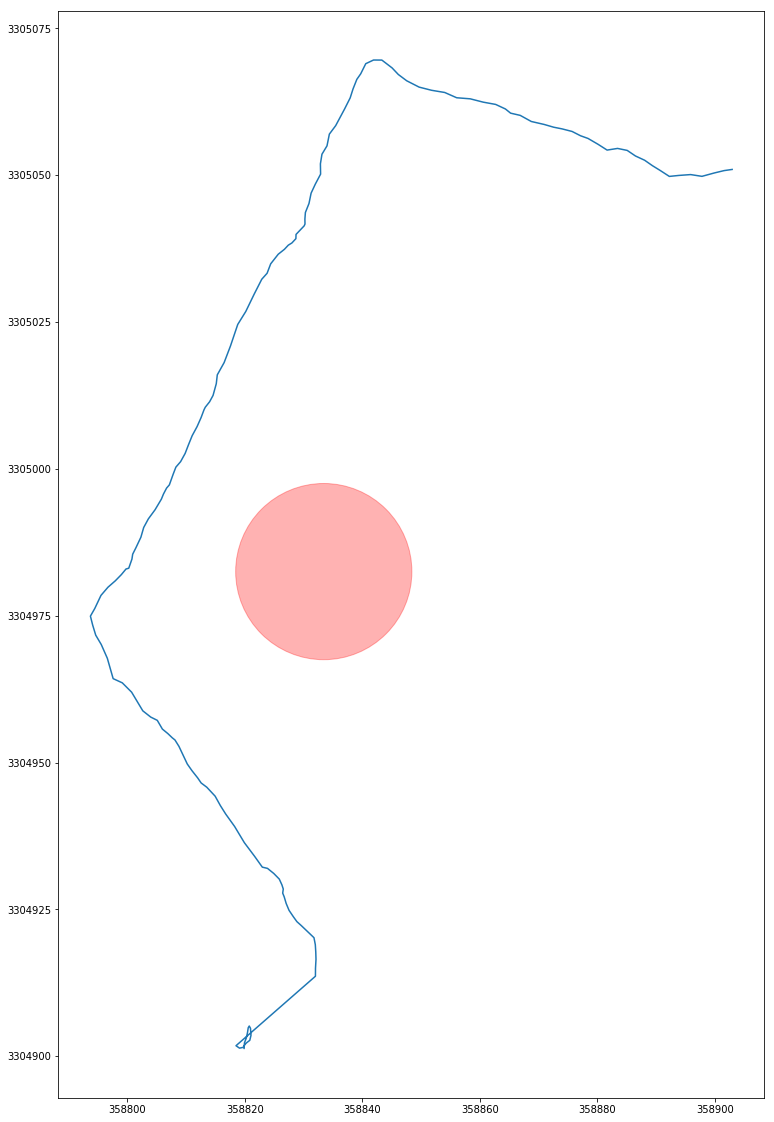

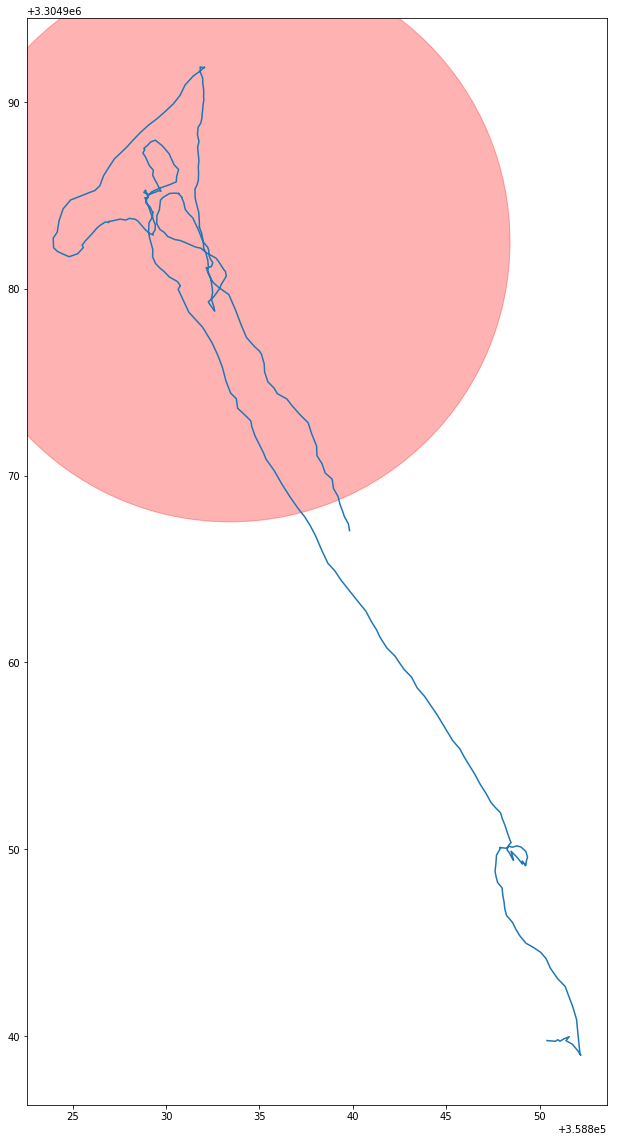

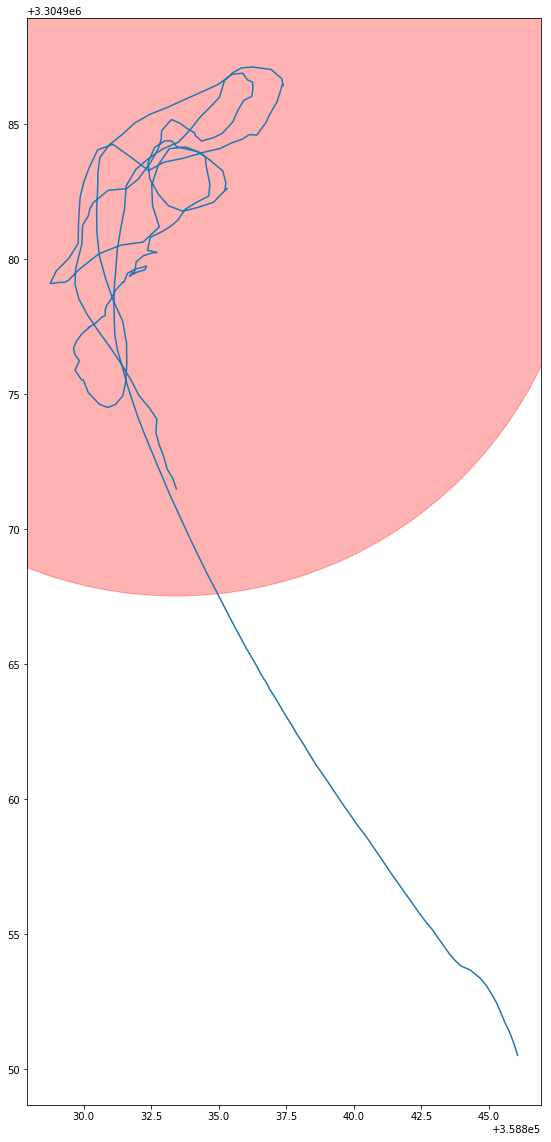

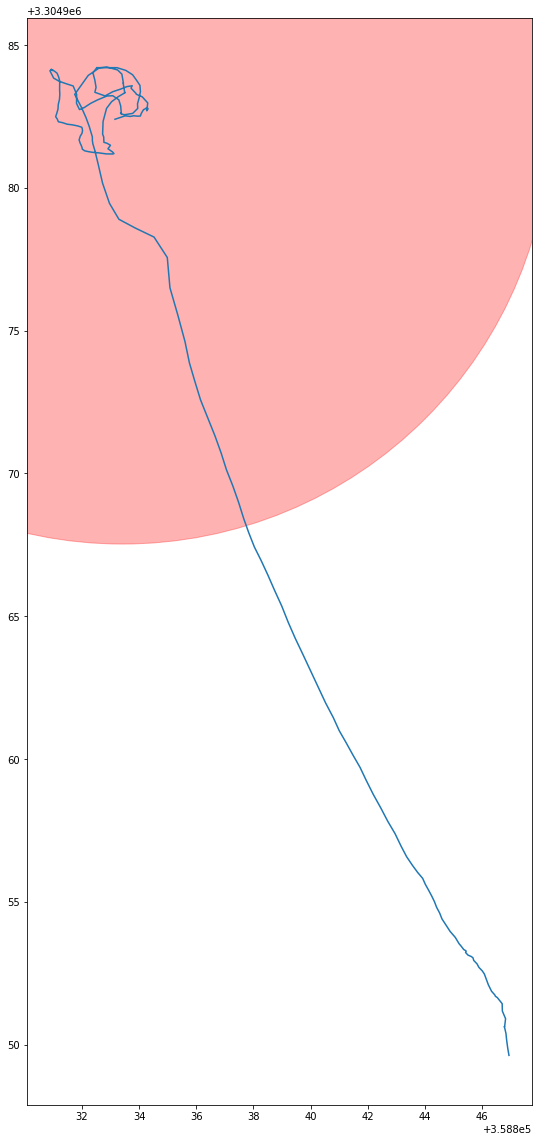

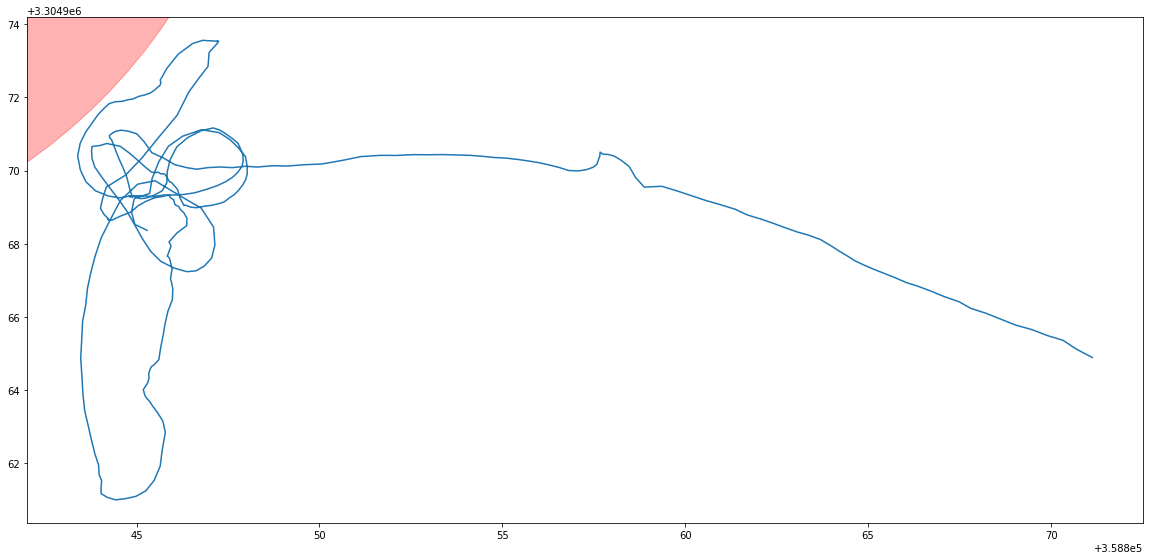

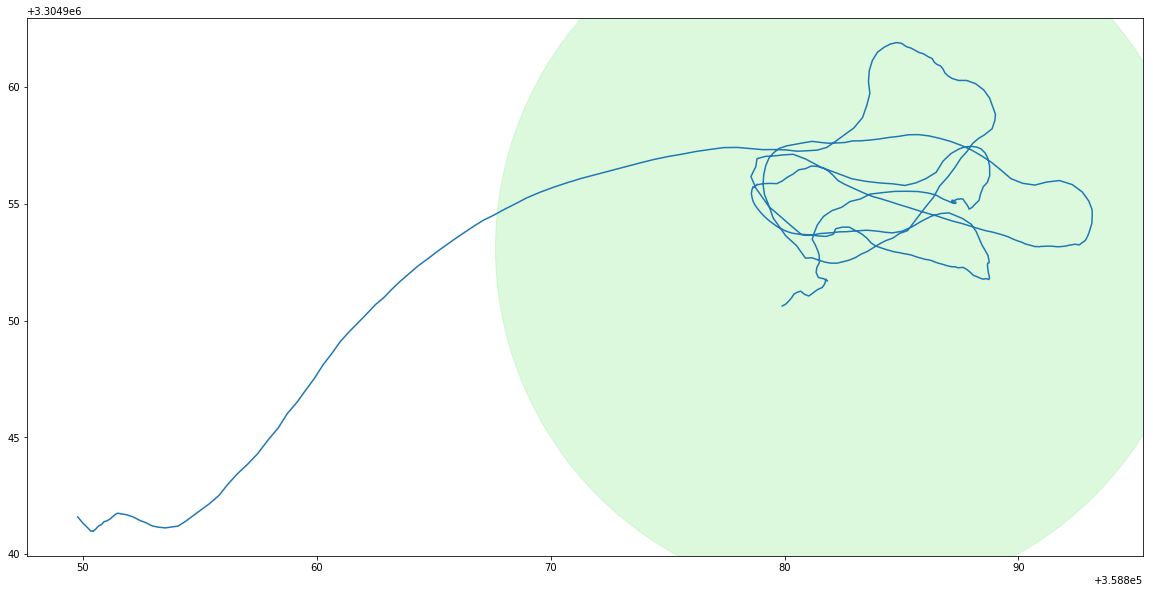

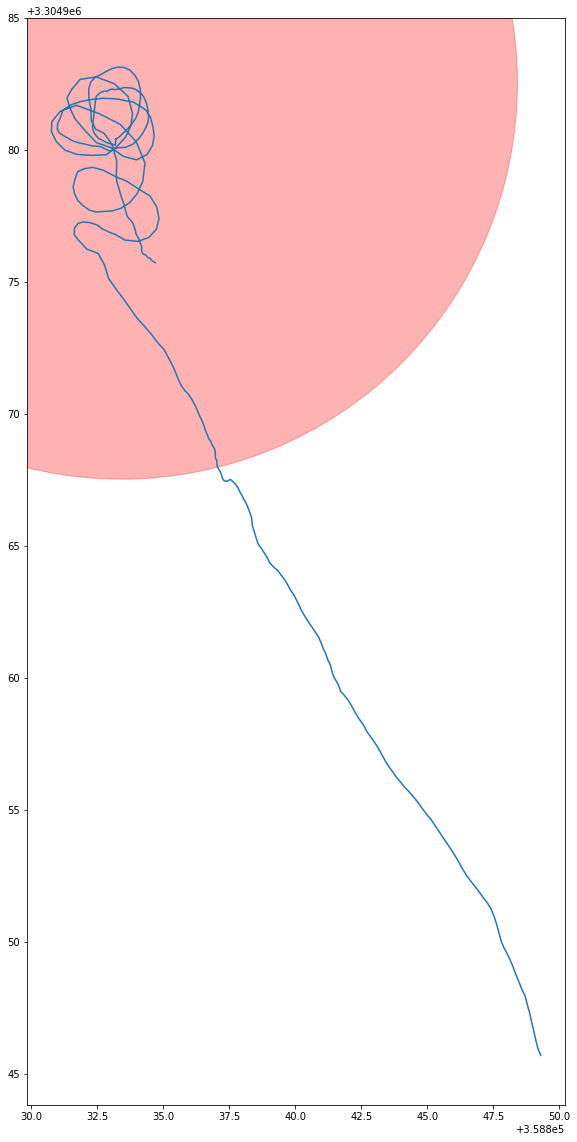

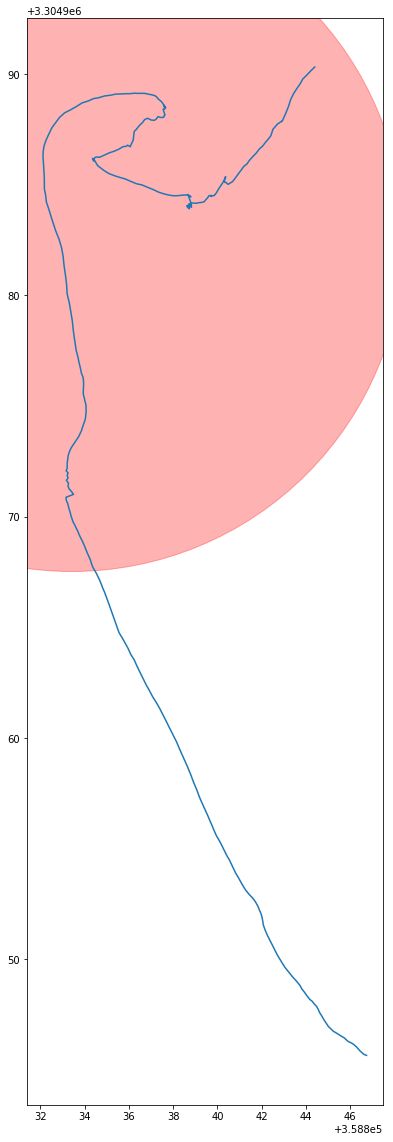

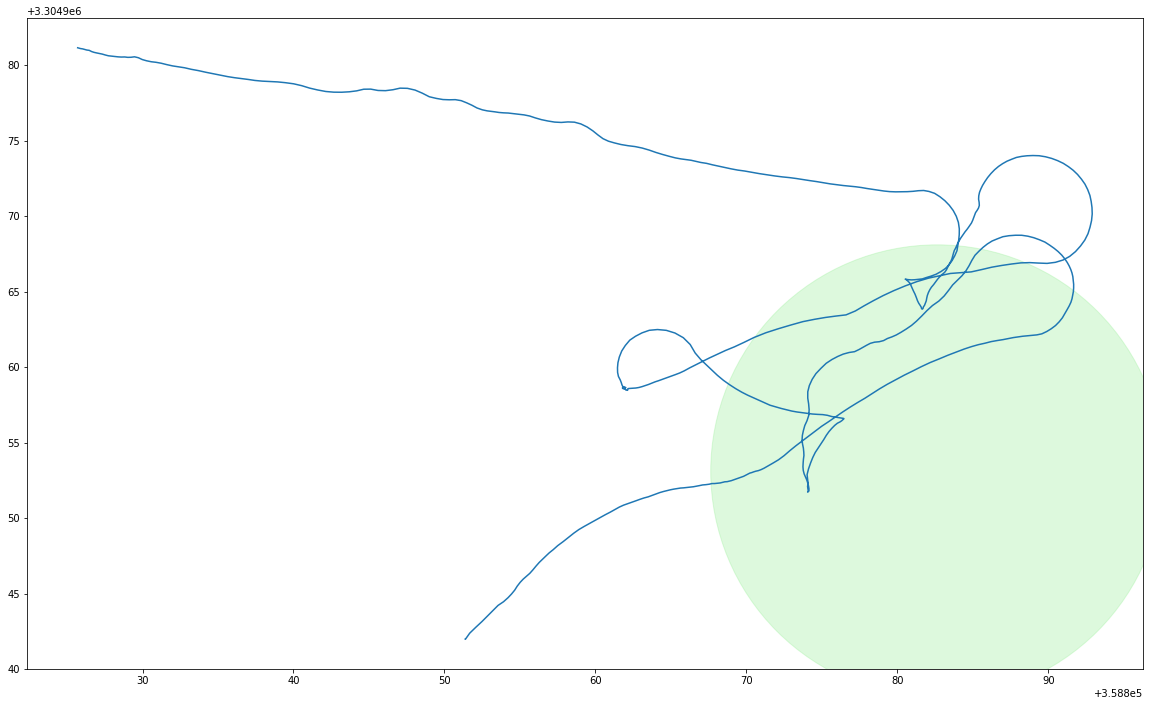

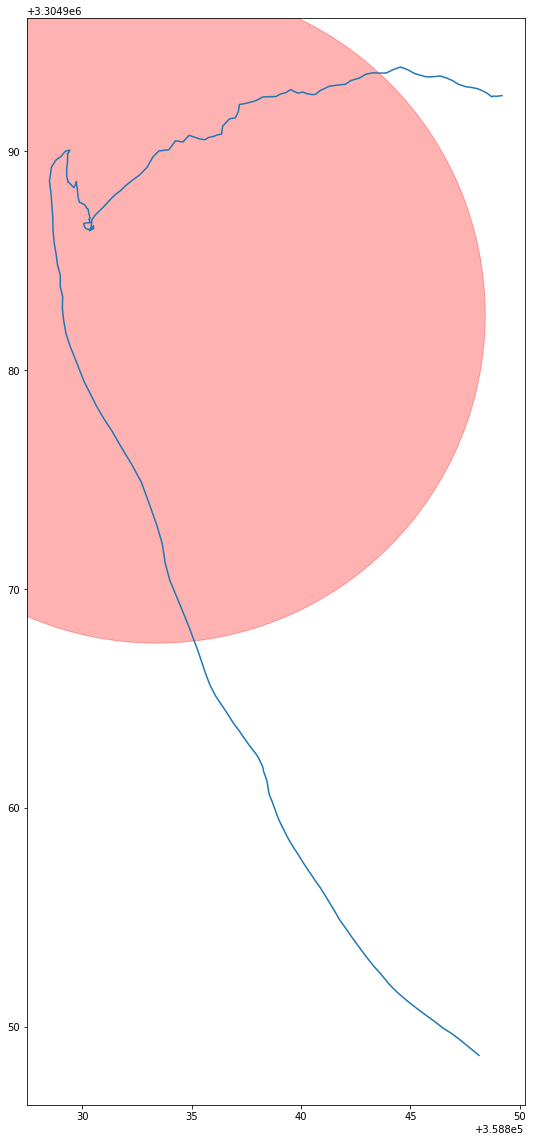

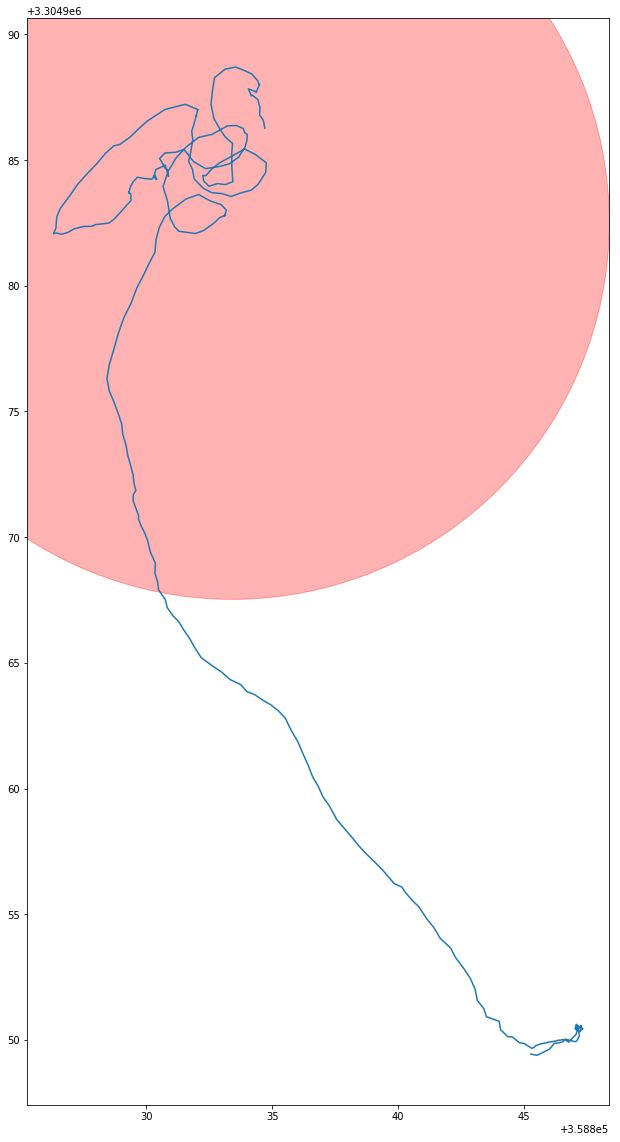

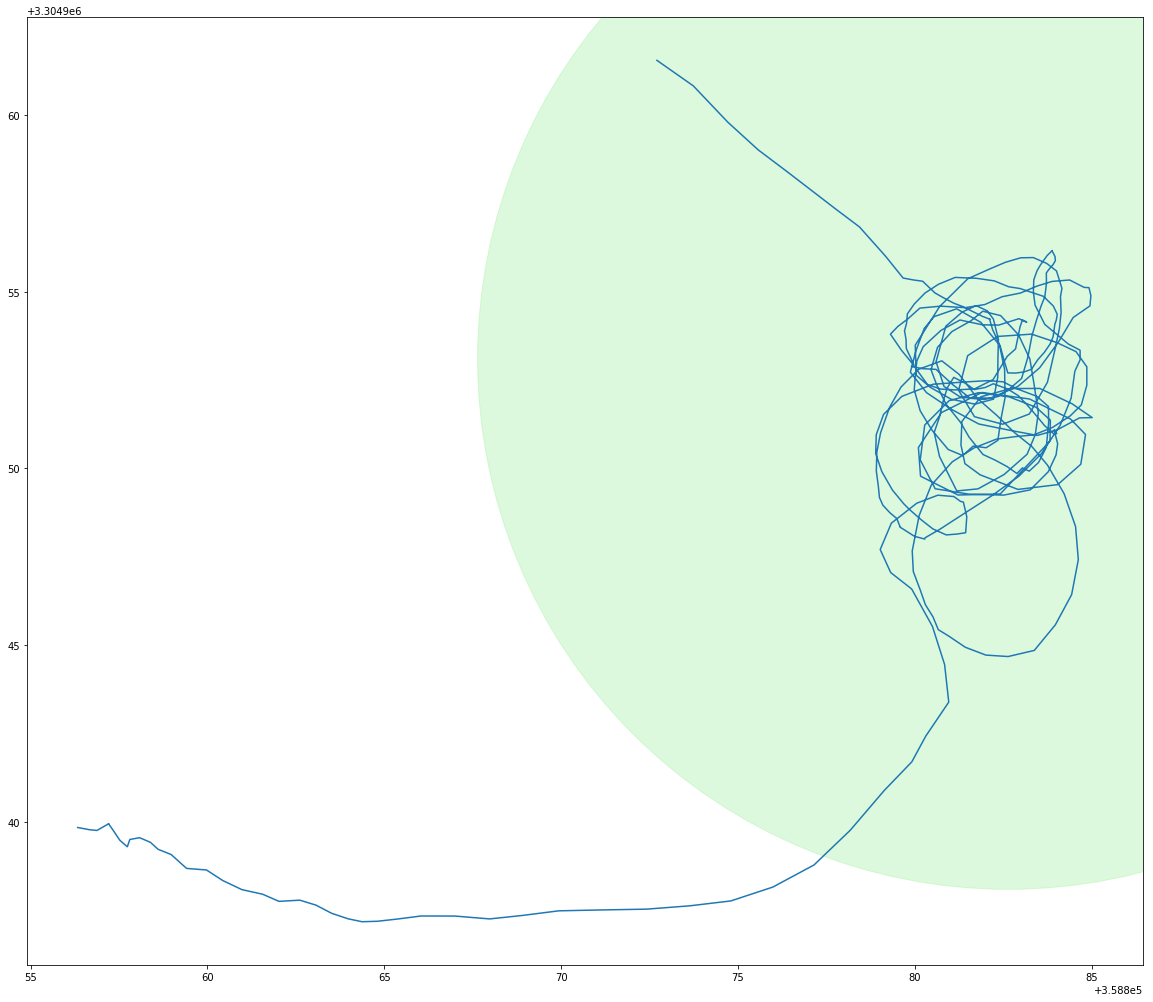

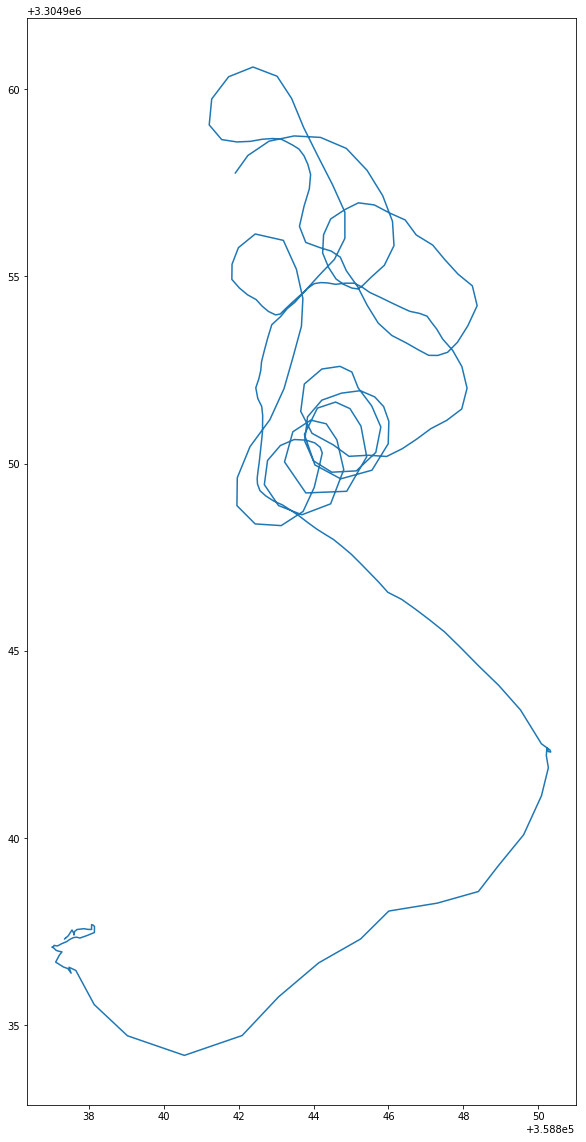

In [8]:
south_PM_attempts = glob.glob('./south/PM/*.csv')
for attempt in south_PM_attempts:
    plot_trajectory(attempt)

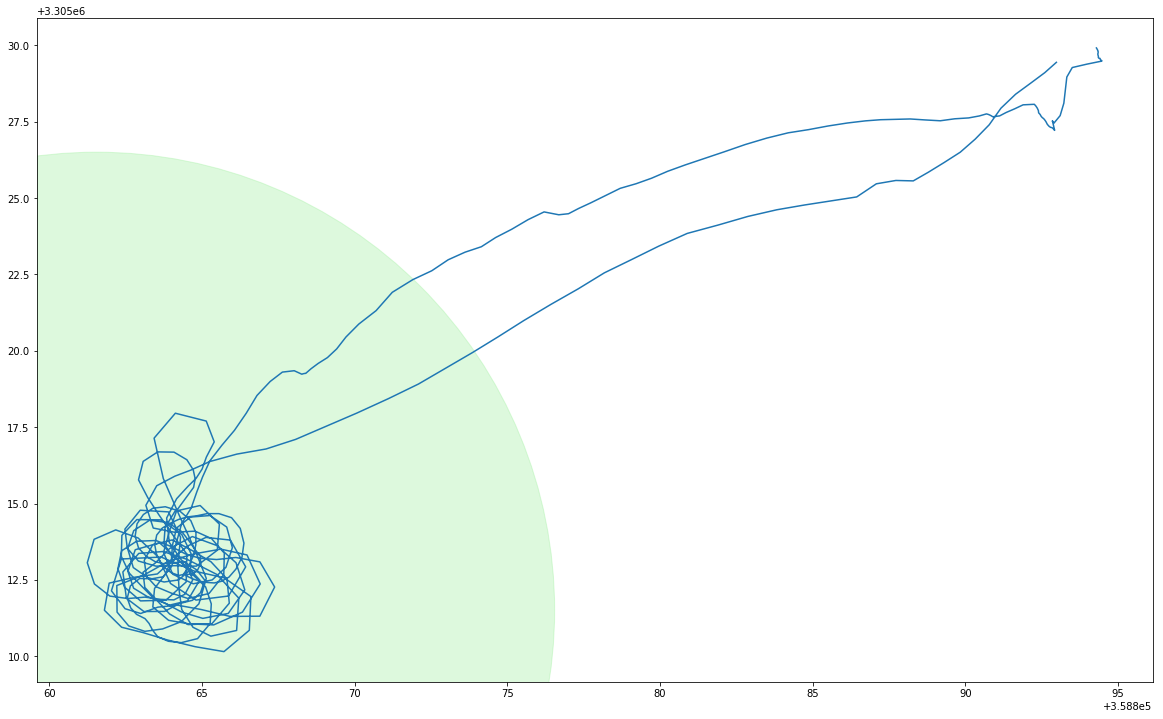

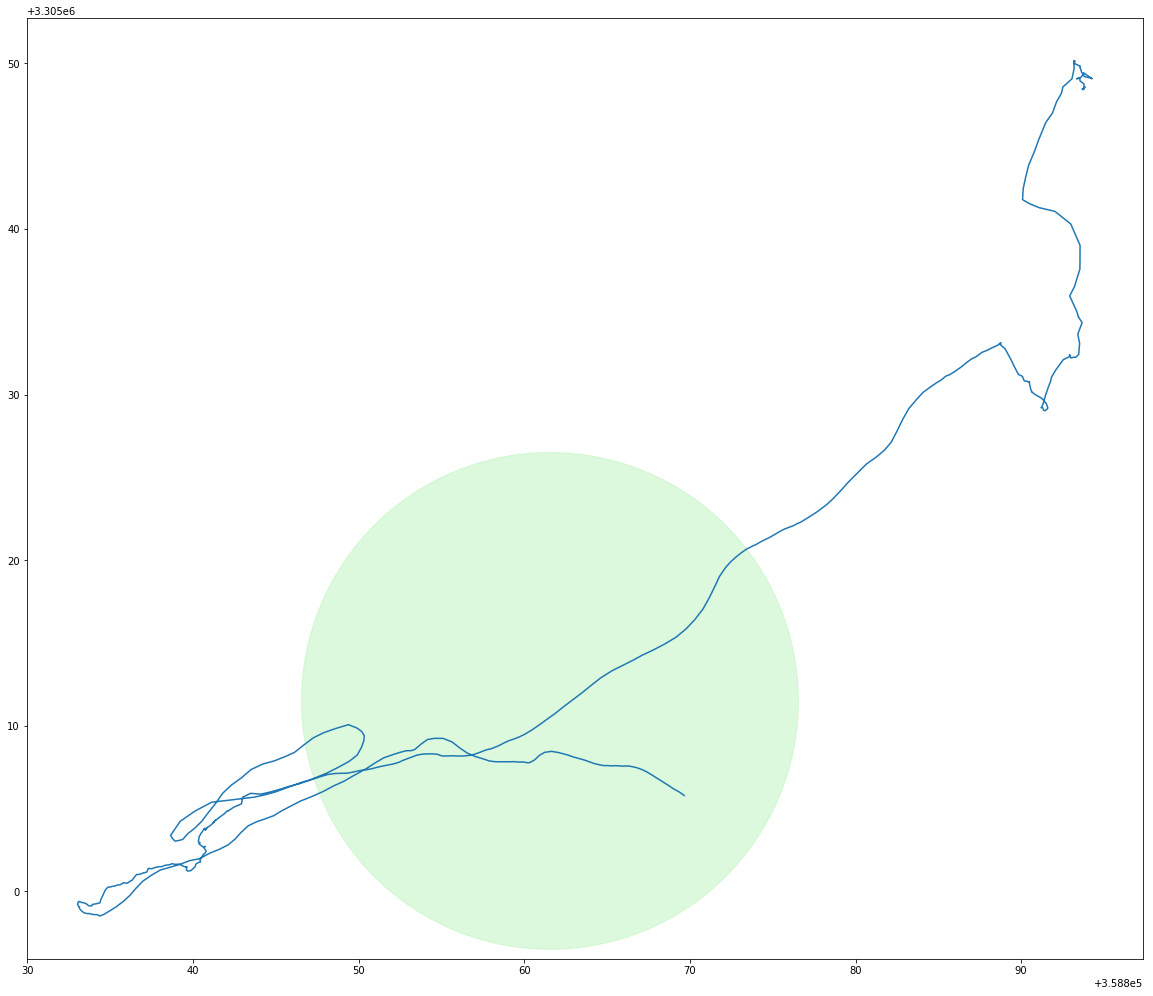

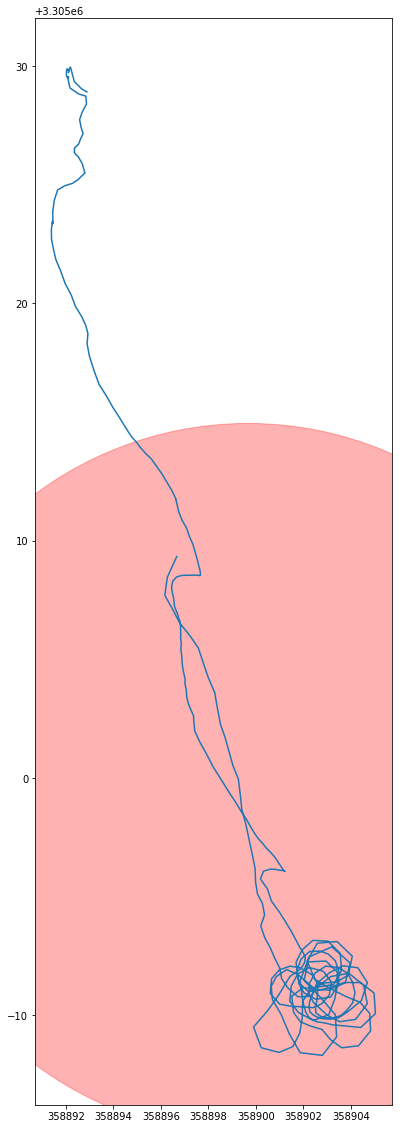

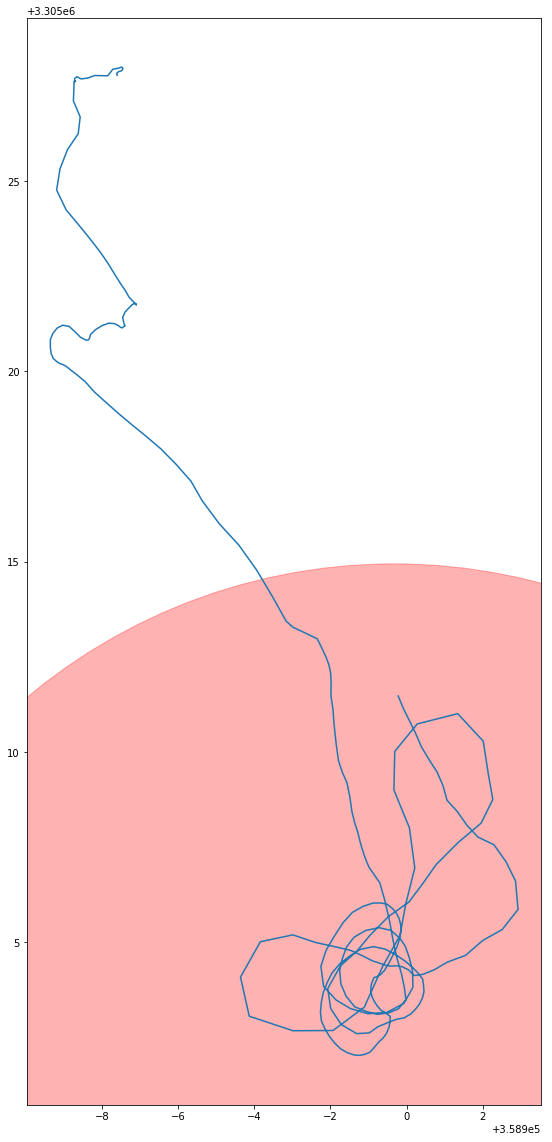

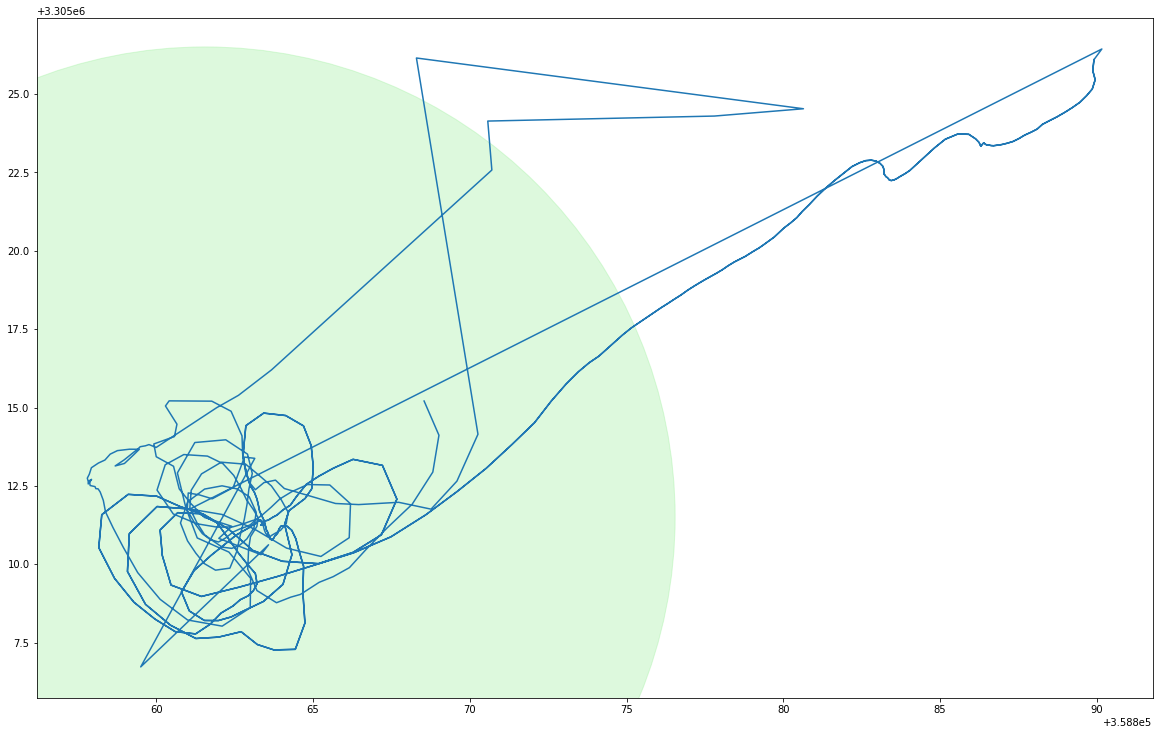

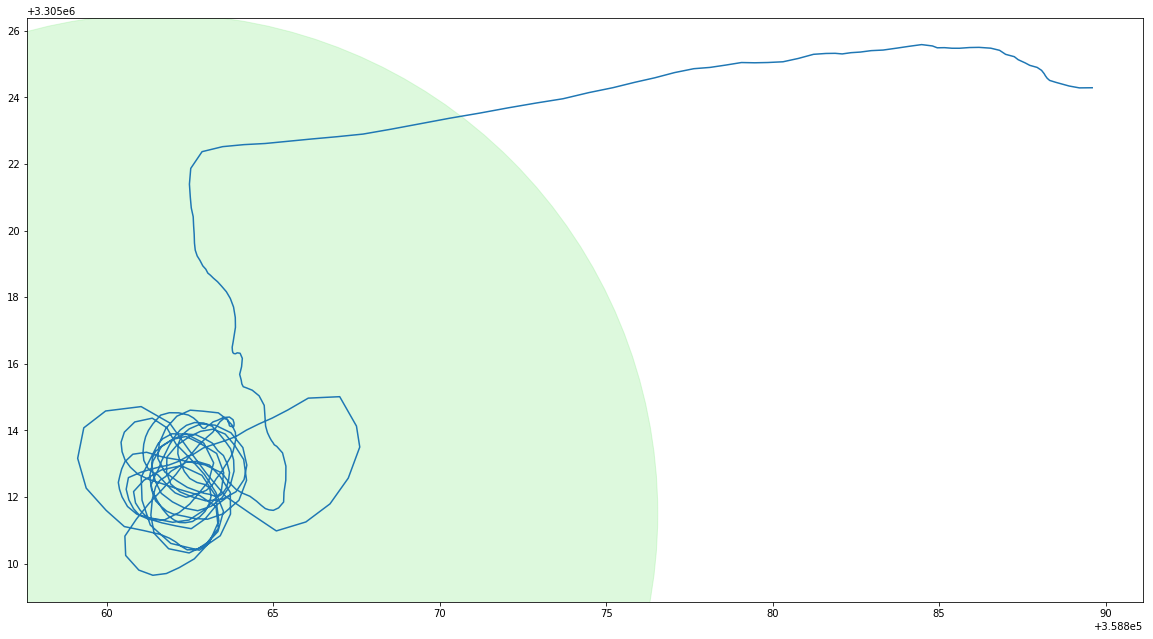

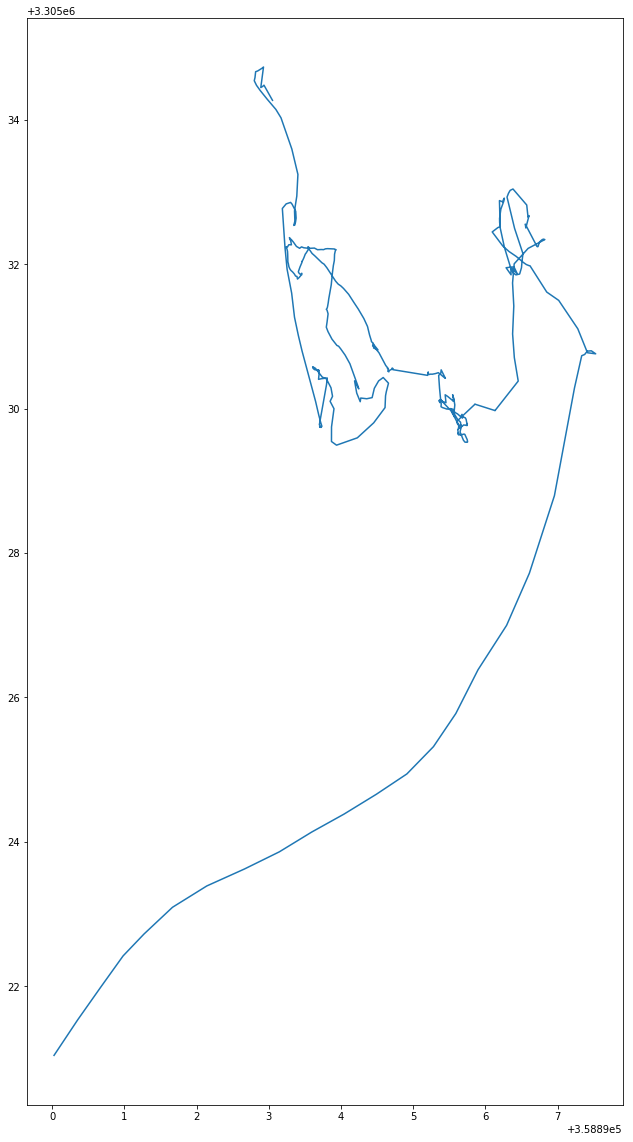

In [9]:
north_AM_attempts = glob.glob('./north/AM/*.csv')
for attempt in north_AM_attempts:
    plot_trajectory(attempt)

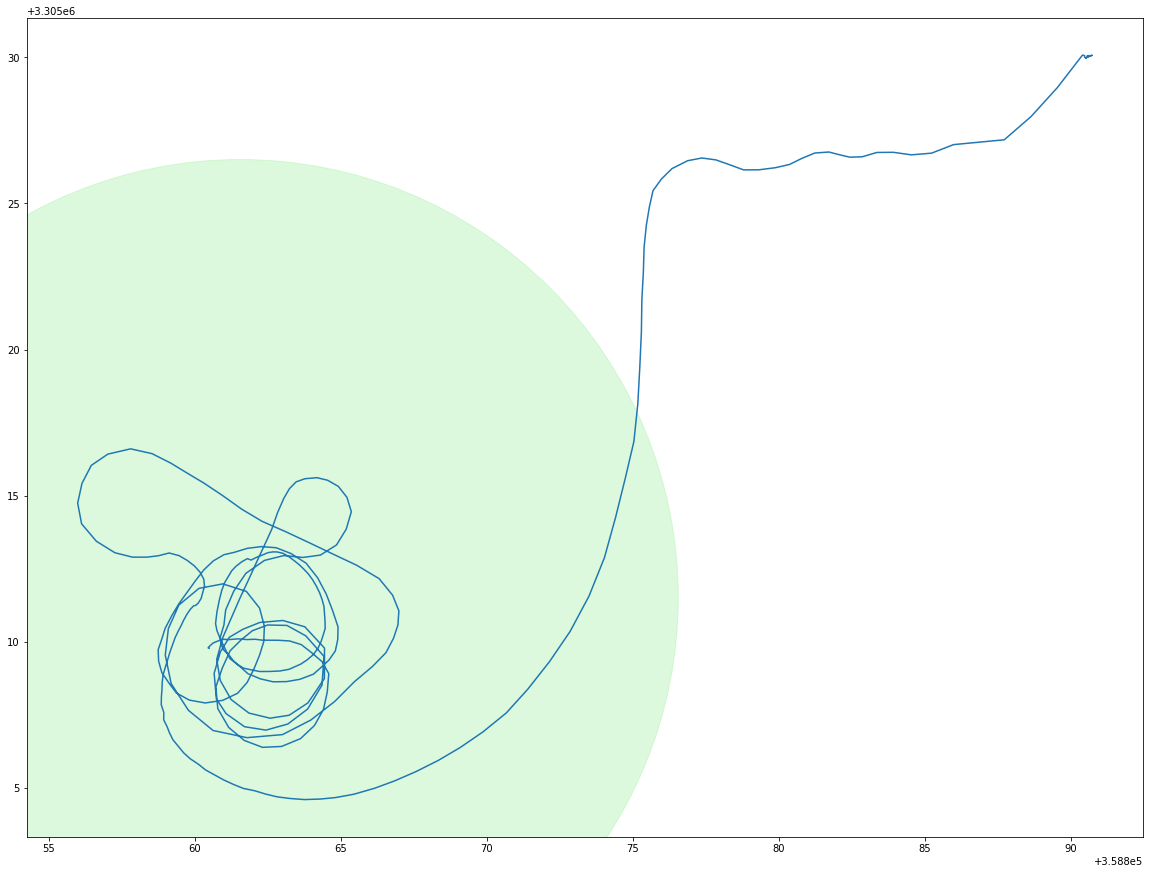

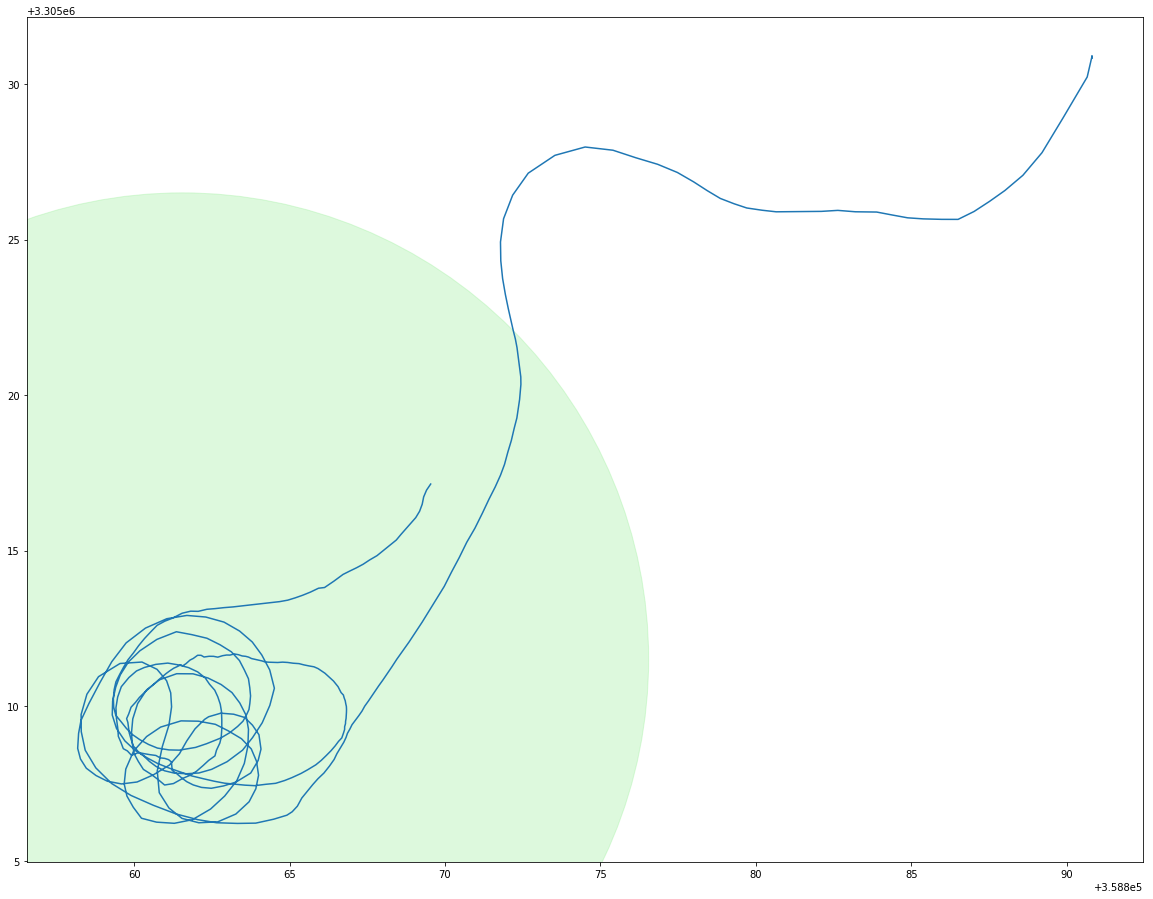

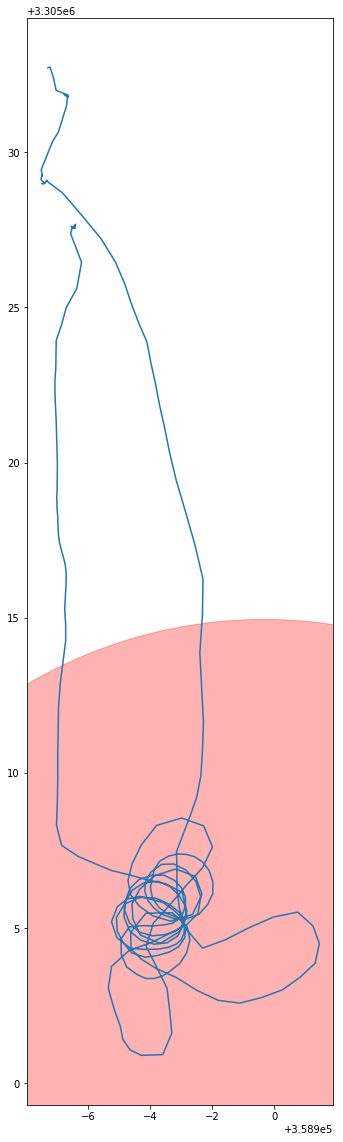

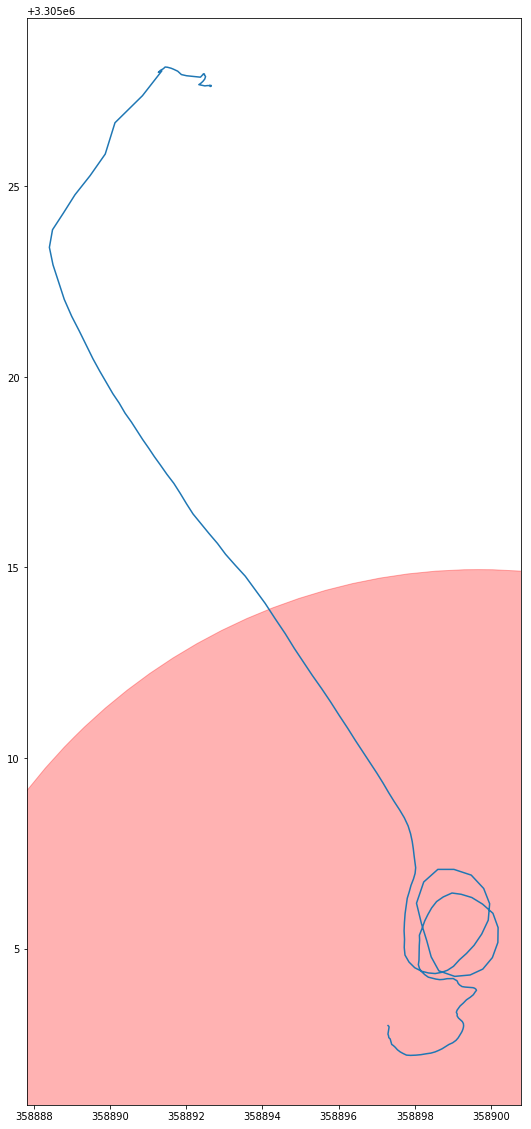

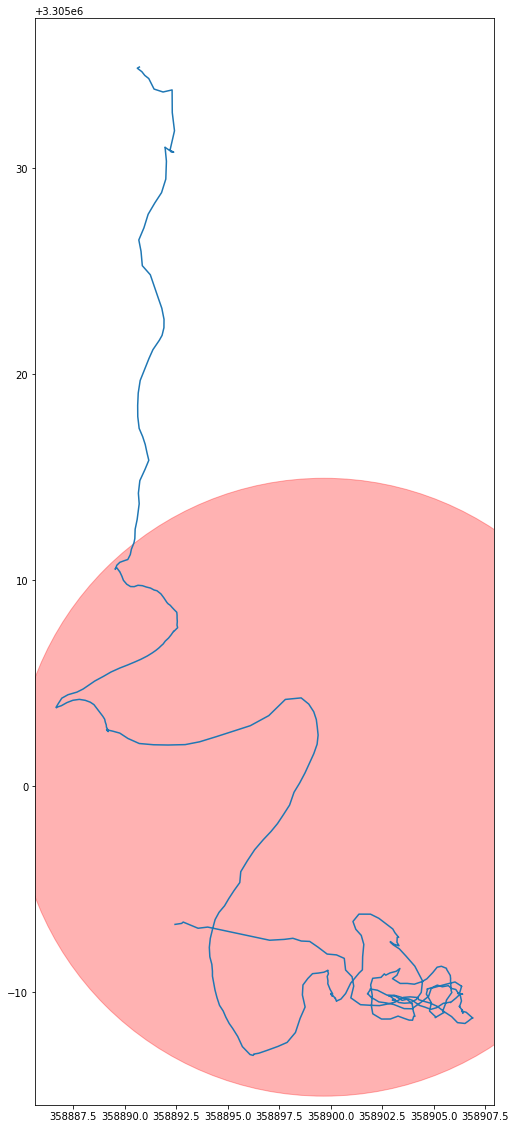

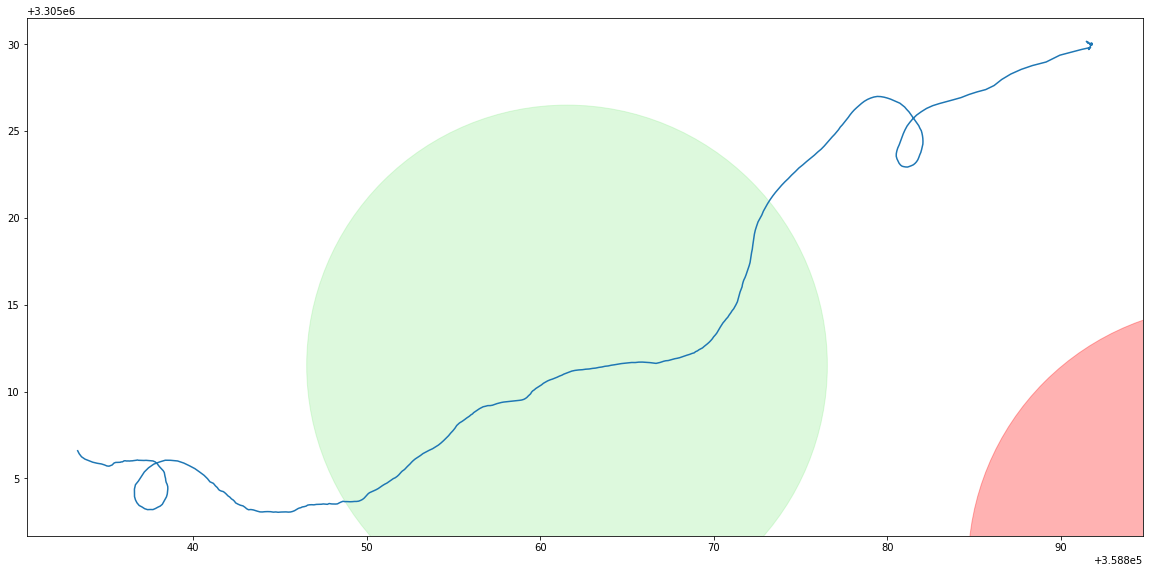

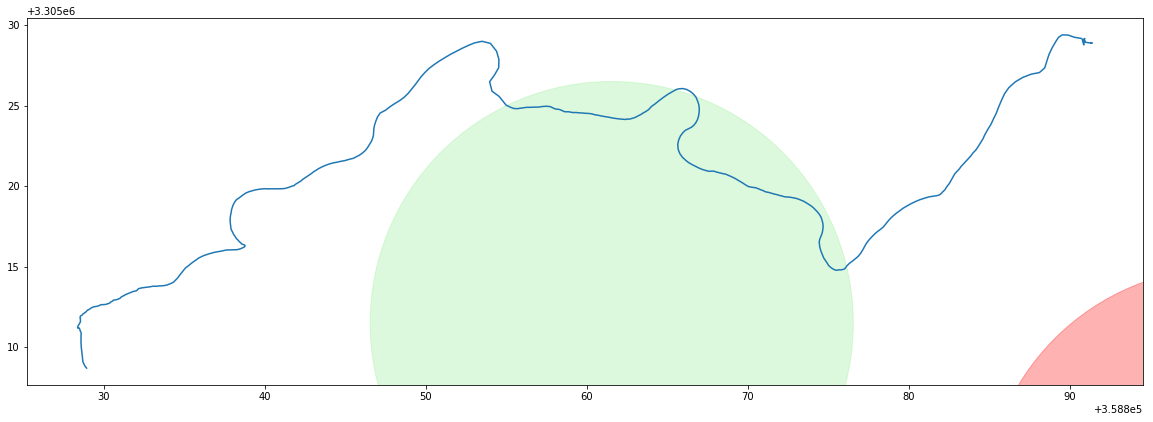

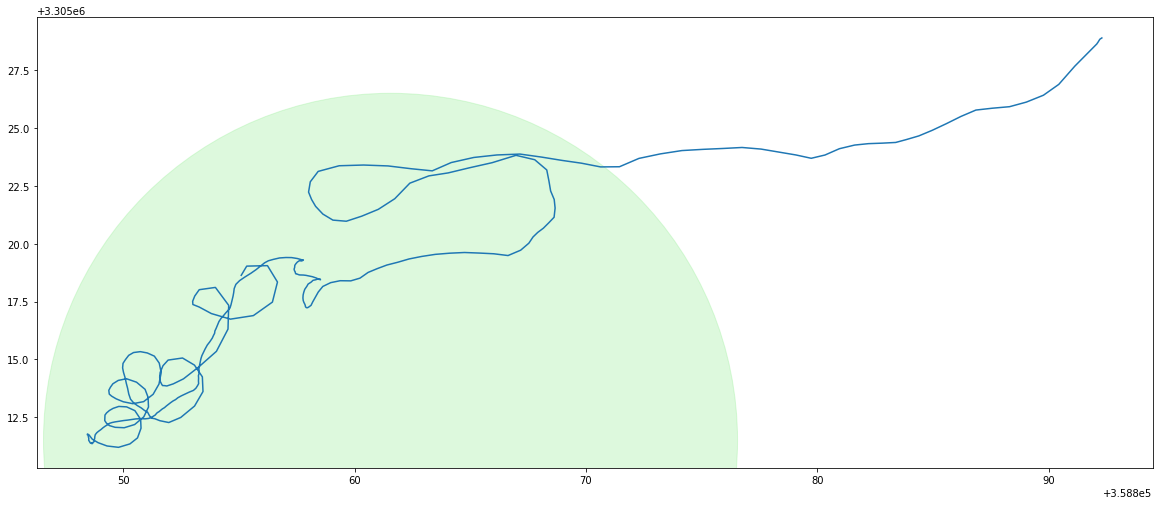

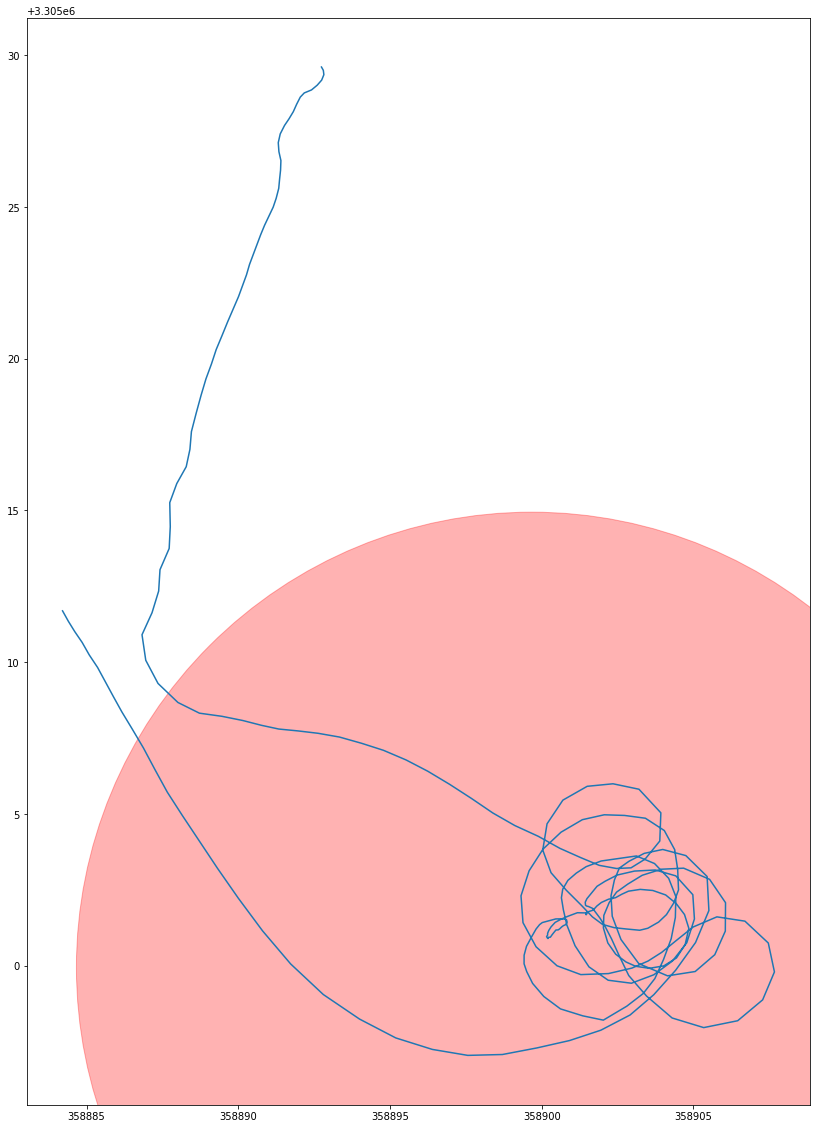

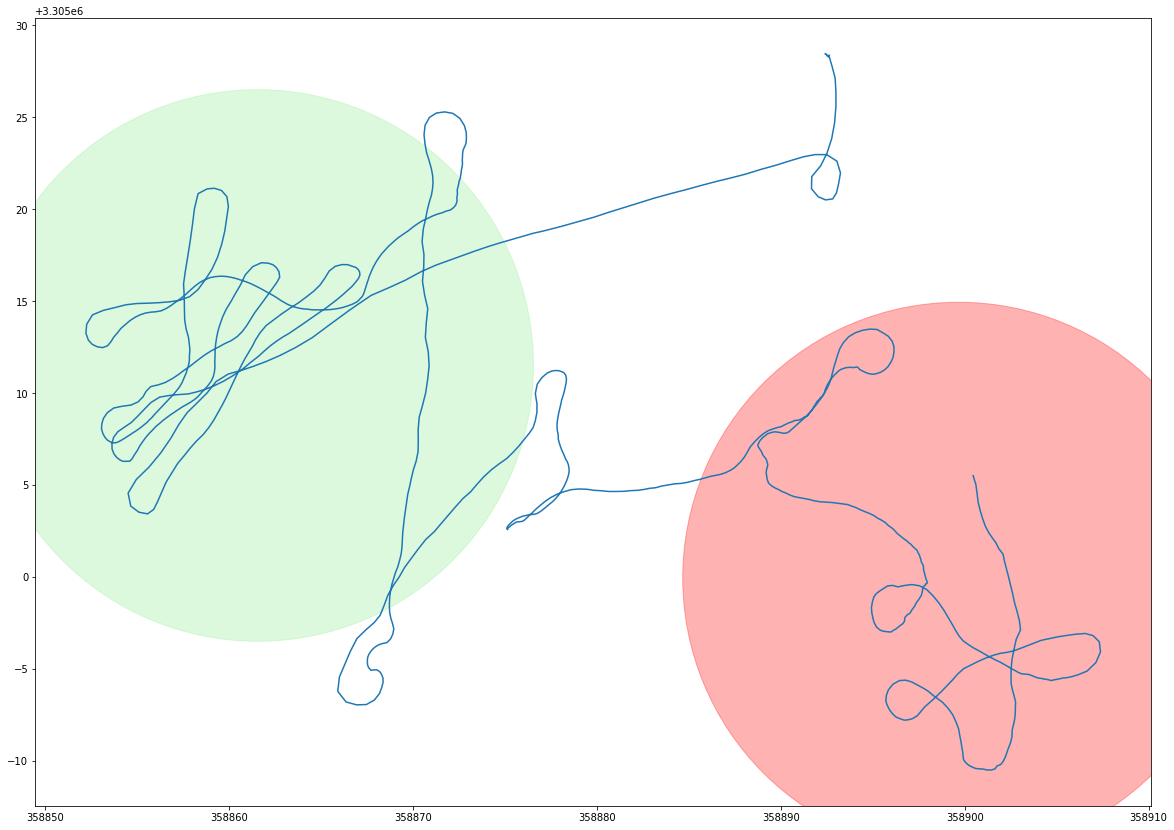

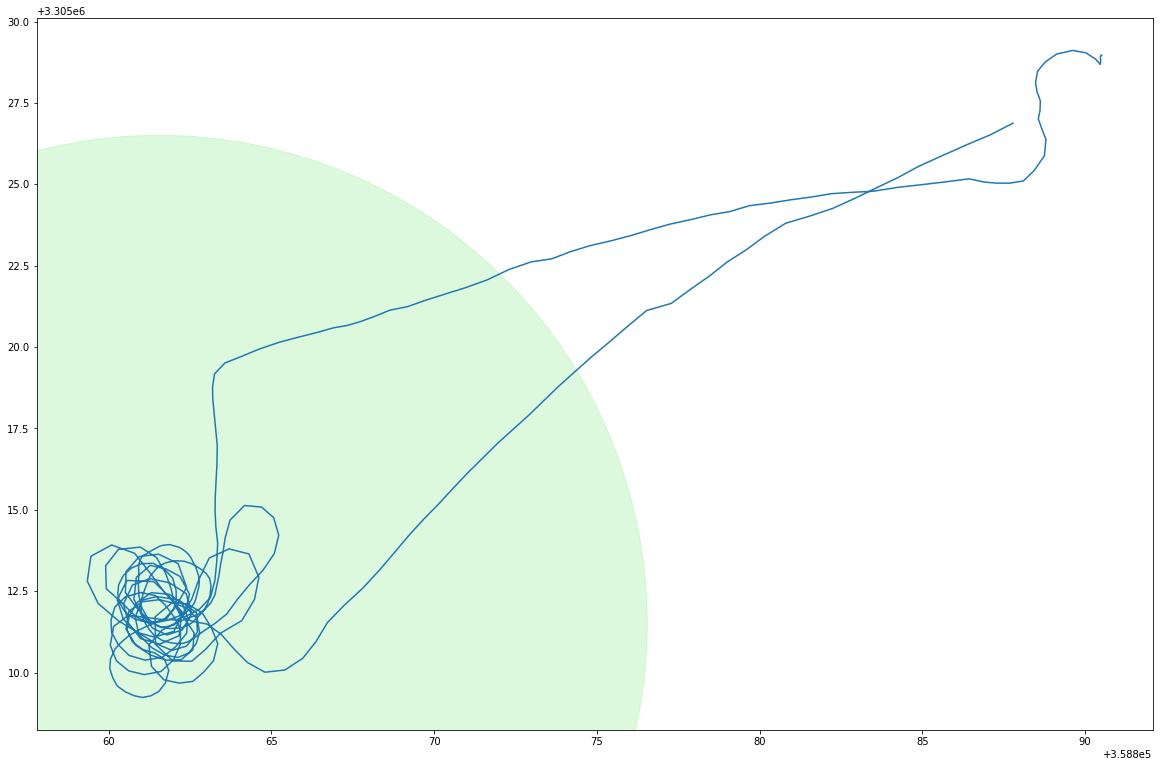

In [10]:
north_PM_attempts = glob.glob('./north/PM/*.csv')
for attempt in north_PM_attempts:
    plot_trajectory(attempt)